# Table of Contents

# <a href='#Business Case Study Introduction'> Introduction</a>

# <a href='#I) Part 1 - Date Dimension'> I) Date Dimension</a>

# <a href='#II) Part 2 - Data Quality'> II) Data Quality</a>

# <a href='#A) Duplicates'> A) Duplicates</a>

# <a href='#B) Revision Date Field in Opportunity Table'> B) Revision Date Field in Opportunity Table</a>

# <a href='#C) Revision Opportunity Stage Status'> C) Revision Opportunity Stage Status</a>

# <a href='#D) Revision Opportunity Type'> D) Revision Opportunity Type</a>

# <a href='#III) Part 3 - All hands meeting preparation'> III) All hands meeting preparation</a>

# <a href='#A) Chief Marketing Officer'> A) Chief Marketing Officer</a>

# <a href='#B) VP Sales'> B) VP Sales</a>

# <a href='#C) Head of Finance'> C) Head of Finance</a>

# <a href='#D) CEO'> D) CEO</a>



# <a id='Business Case Study Introduction'> Introduction</a>

# Case Study - Helping Data Analyts to get clean and structured data

## Context

You are a Data Engineer/Analyst working in the Finance & Operations team of SaaS Software Company : BSE Inc. 

BSE is the one of leader in the Data market thanks to its amazing Business Intelligence tool.

There two recurring tasks data team perform that are important for the company: 

Each month during the All-hands meeting, the CEO present in front of all BSE employees the key figures of the sales & marketing performance but also the finance report. 
The first task is collaborate with Data Analysts to help them collect and gather the right data to answer important business questions.
The second indeed is to work with them to analyze data and answer to business leaders question


## Your mission

In the data team, to help them answering business questions, many data analysts are requesting for more data inside the data warehouse. 
They want to have access to tables with all dates and they want to be able to identify weekends and public holidays.

As a Data Engineer, we know we can help them using python datetime librairy and the [OpenHolidaysAPI](https://www.openholidaysapi.org/en/).

The first part of your mission is to help them creating this date dimension and enrich it with external data. You will first create a POC (proof of concept) to validate it's possible to build this kind of table and enrich the data.

During the second part of your mission you will ingest CRM data in the data warehouse and use this data to anwser business questions


### Your TO-DO list

- ⚠️ ALL Ingestion related tasks should be done using Python

- ⚠️ ALL Transformation/modeling related tasks should be done using SQL (using dbt is recommended but not required)

- Instead of a real data warehouse for this POC we will use DuckDB which is a more lightweight database.

- You can use empty cells below to code and document your work

- Please provide when you are done a zip with the copy of your notebook with your answers and your duckdb database [export](https://duckdb.org/docs/sql/statements/export.html) in `sales.db`


### Part 1 - Date Dimension
1. Extract and ingest public holidays in France (french language) from 2020 to 2025 from API [OpenHolidaysAPI](https://www.openholidaysapi.org/en/) in a table `dim_date_public_holidays` 

2. Build the date dimension and ingest it into the data warehouse with alias `date_dim`. The date dimension contains each each day from 2020 to 2025. 
    
3. In addition of this day column, we can transform the date dim with following columns :
    - month_number: number of the month
    - date_month: date formatted "YYYY-MM"
    - date_quarter: date formatted "YYYY-QX" where X is the number of the quarter
    - date_year:  date formatted "YYYY"
    - is_weekend: set as True if day is a week-end day (saturday, sunday) or False if not


4. Transform and enrich `date_dim` table by adding `is_public_holidays` boolean column which is set as True when the day is included in public holidays period and False if not

### Part 2 - All hands meeting preparation

1. Ingest data stored in csv files in `datasets/sales/` in tables inside data warehouse
2. Use the prepared output tables to anwser Business Leader requests.

__Example of answer__

Which are the top 5 industries counting the most open opportunities in created in 2023 ?

![example](images/ex_of_sql_answer.png)

---

## CRM - Data Dictionnary

### Accounts (`./datasets/sales/accounts - crm export.csv`)

_List of our Customers or Prospects companies_

__Columns__:

- `Id` : Identifier of the company
- `Name` : Name of the company
- `Industry` : Industry of the company

### Contacts (`./datasets/sales/contacts - crm export.csv`)

_List of our Customers or Prospects contacts_

__Columns__:

- `id` : Identifier of the contact
- `accountid` : Identifier of the company where the contact is working 
- `fullname` : fullname of the contact
- `job_title`: job_title of the contact

### Opportunities (`./datasets/sales/opportunities - crm export.csv`)

_Main object of our CRM. An opportunity is a source of potential Software and Services revenue. The goal of each Sale is to close and won all of them_ 

- `id`: Identifier of the opportunity
- `accountid`: Identifier of the account associated to the opportunity
- `type`: type of the opportunity
    - `New Business`: opportunity generated with a new account prospect ou customer
    - `Upsell`:  when we sell additional products within an existing opportunity.
    - `Cross-sell`: opportunity generated with a new entity of an existing accountcustomer
    - `Renew`: renewal of an existing opportunity
- `deal_license_activation_start_date__c`: Start date of the software licence souscription.
- `deal_license_activation_end_date__c`: End date of the software licence souscription.
- `closedate`: Date of closing of the opportunity. If the opportunity is won it's a close won date, if the opportunity is lost it's a close lost date and if the opportunity is open it's an expected close date.
- `createddate`: Opportunity creation date 
- `opportunity_stage_status__c`: Status of the Opportunity within the Sales process.
    - `Open` : Sales is still working on the Opportunity
    - `Won`: Sales won the opportunity
    - `Lost`: Sales lost the opportunity
- `leadsource_category__c`: Source of the opportunity, who found it
    - `Marketing`: Opportunity founded/generated by Marketing team
    - `Sales Generated`: Opportunity founded/generated by the Sales team
    - `Partner Generated`: Opportunity founded/generated by Partners
    - `SDR Generated`:Opportunity founded/generated by the SDR team
- `deal_total_non_recurring__c`: Amount of services revenues
- `deal_total_recurring__c`: Amount of software revenues
- `currencyisocode`: Currency used for Services, Software revenue.
- `name`: Name of the opportunity
- `ownerid`: Identifier of the BSE sales user who is working on the opportunity

### Opportunities_contact_roles (`./datasets/sales/opportunities_contact_roles - crm export.csv`)

_List of contacts associated to oppotunities._

__Columns__:

- `id` : Identifier of the relation
- `contactid` : Identifier of the contact
- `opportunityid`: Identifier of the opportunity
- `role`: Opportunity project role

### Users (`./datasets/sales/crm_users - crm export.csv`)

_List of all BSE Sales_

__Columns__:

- `id` : Identifier of the sales user
- `team_country__c` : Country of the user 
- `fullname` : User fullname
- `team_name`: Team of the user 


---
## Business Leader requests


### Chief Marketing Officer

⚠️ All Software and Services revenue figures should be diplayed in Euros (1 EUR = 1,1 USD)

1. Which account industry count the most closed won opportunities in created in 2020 ?

2. Which account industry count the most lost opportunities created in 2020 ?



### VP Sales

For open opportunities created since 2020:

1. How many upsell, cross-sell opportunities we expect to close in the 2nd quarter of 2021 (March 21 > June 21 ) ?

2. How many renewals we expect to close in the last quarter of 2021 (sep 21 > dec 21 ) ?

For close won opportunities in 2020:

3. Based on the Software revenue, who are the top 5 Sales of the year ? 


### Head of Finance

For opportunities created since 2018 :

1. Based on the Software Revenue, which is our top account customer ?


For won opportunities with a souscription period running in 2020:

⚠️ All Software and Services revenue figures should be diplayed in Euros (1 EUR = 1,1 USD)

2. What is the Total ARR ?

```

ARR = MRR * 12
MRR = RECURRING REVENUE / ENGAGEMENT PERIOD
ENGAGEMENT PERIOD (in months) = SOUSCRIPTION END DATE - SOUSCRIPTION START DATE

```

3. Who are our top 5 account customers based on the __software revenue__ of closed won opportunities in 2020 ?

### CEO

1. What is the average duration in month of our sales cycle in 2020 ?

2. What is the average duration in month of our optimized sales cycle in 2020 ?


```
Sales cycle duration = difference between created date and close date for opportunities which are closed lost and closed won

Sales cycle duration optimized = Sales cycle duration calculation but only for working days (days not included in weekends and public holidays)
```

---

Your  work can start at the next cell below.

Good luck, our data team and CEO need us !!!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import duckdb
import requests as req
from IPython.display import display, HTML
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
# we create the DuckDB sales database
con = duckdb.connect("sales.db")

In [5]:
display(HTML("<style>.container { width:100% !important; }</style>"))

# <a id='I) Part 1 - Date Dimension'> I) Date Dimension</a>

## 1. Extract and ingest public holidays in France (french language) from 2020 to 2025 from API [OpenHolidaysAPI](https://www.openholidaysapi.org/en/) in a table `dim_date_public_holidays` 


In [6]:
s = req.Session()

In [7]:
import datetime

In [8]:
country_code = 'FR'
language_iso_code = 'FR'
year_counter = 0

for year in [2020, 2021, 2022, 2023, 2024, 2025]:
    
    print(year)
    
    first_day_of_year = str(date(year, 1, 1))
    last_day_of_year = str(date(year, 12, 31))
    
    api_url = 'https://openholidaysapi.org/PublicHolidays?countryIsoCode={country}&languageIsoCode={language}&validFrom={start_date}&validTo={end_date}'.format(country=country_code, language = language_iso_code, start_date = first_day_of_year, end_date = last_day_of_year)
    
    json_data_public_holidays_fr = s.get(api_url).json()
    
    holiday_counter = 0
    
    for holiday in json_data_public_holidays_fr:
        
        
        holiday_data_parsed = pd.DataFrame({'start_date': holiday['startDate'], 'end_date': holiday['endDate'], 'holiday_type': holiday['type'], 'name': holiday['name'][0]['text'], 'nationwide': holiday['nationwide']}, index = [0])
        
        #print(holiday_data_parsed)
        
        if holiday_counter == 0:
            
            holiday_counter += 1
            
            holiday_full_data_parsed = holiday_data_parsed.copy()
            
        else:
            
            holiday_full_data_parsed = pd.concat([holiday_full_data_parsed, holiday_data_parsed.copy()])
        
        #print(holiday_full_data_parsed)
        
    holiday_full_data_parsed['country'] = country_code
    holiday_full_data_parsed['language'] = language_iso_code
    holiday_full_data_parsed['year'] = year
    
    if year_counter == 0:
        
        year_counter += 1
        
        holiday_full_data_parsed_all_years = holiday_full_data_parsed.copy()
        
    else:
        
        holiday_full_data_parsed_all_years = pd.concat([holiday_full_data_parsed_all_years, holiday_full_data_parsed.copy()])
        
        
    
    #print(json_data_public_holidays_fr)

2020
2021
2022
2023
2024
2025


## Let's create the table dim_date_public_holidays

In [9]:
duckdb.sql('CREATE OR REPLACE TABLE dim_date_public_holidays AS (SELECT * FROM holiday_full_data_parsed_all_years)')

## 2. Build the date dimension and ingest it into the data warehouse with alias `date_dim`. The date dimension contains each  day from 2020 to 2025. 



In [10]:
dates_list = list(pd.date_range(start="2014-01-01",end="2025-12-31"))

dates_list = [str(date)[:10] for date in dates_list]

In [11]:
dates_data = pd.DataFrame(dates_list)

In [12]:
dates_data = dates_data.rename(columns = {0: 'ymd'})

In [13]:
duckdb.sql('CREATE OR REPLACE TABLE date_dim AS (SELECT * FROM dates_data)')

3. In addition of this day column, we can transform the date dim with following columns :
    - month_number: number of the month
    - date_month: date formatted "YYYY-MM"
    - date_quarter: date formatted "YYYY-QX" where X is the number of the quarter
    - date_year:  date formatted "YYYY"
    - is_weekend: set as True if day is a week-end day (saturday, sunday) or False if not

In [14]:
third_question_date_query = '''


SELECT

    ymd,
    
    MONTH(CAST(ymd AS DATE)) AS month_number,

    CAST(DATE_TRUNC('month', CAST(ymd AS DATE)) AS VARCHAR) AS date_month,
    
    YEAR(CAST(ymd AS DATE)) || '-Q' || QUARTER(CAST(ymd AS DATE)) AS date_quarter,
   
    CAST(YEAR(CAST(ymd AS DATE)) AS VARCHAR) AS date_year,
    
    CASE
    WHEN DATE_PART('dayofweek', CAST(ymd AS DATE)) IN (0,6) THEN TRUE
    ELSE FALSE
    END AS is_weekend

FROM date_dim


'''

In [15]:
updated_dim_date_data = duckdb.sql(third_question_date_query).df()

In [16]:
duckdb.sql('DROP TABLE date_dim')

In [17]:
duckdb.sql('CREATE TABLE date_dim AS (SELECT * FROM updated_dim_date_data)')

4. Transform and enrich `date_dim` table by adding `is_public_holidays` boolean column which is set as True when the day is included in public holidays period and False if not

In [18]:
duckdb.sql('ALTER TABLE date_dim ADD is_public_holidays BOOLEAN')

In [19]:
fourth_question_date_query = '''

UPDATE date_dim AS date_dim_original

SET is_public_holidays = (

SELECT

    CASE
    WHEN a.ymd BETWEEN b.start_date AND b.end_date AND holiday_type = 'Public' THEN TRUE
    ELSE FALSE
    END AS is_public_holidays


FROM date_dim a

LEFT JOIN dim_date_public_holidays b ON a.ymd >= b.start_date AND a.ymd <= b.end_date

WHERE date_dim_original.ymd = a.ymd

ORDER BY 1


)  

'''

In [20]:
duckdb.sql(fourth_question_date_query)

# Part 2 - All hands meeting preparation

# 1. Ingest data stored in csv files in datasets/sales/ in tables inside data warehouse

In [21]:
accounts_data = pd.read_csv('datasets/sales/accounts - crm export.csv', sep = ';')

In [22]:
accounts_data.shape

(3125, 3)

In [23]:
accounts_data.drop_duplicates(['Industry', 'Name']).shape

(3084, 3)

In [24]:
3125 - 3084

41

In [25]:
(3125 - 3084) / 3084 * 100

1.3294422827496757

- 1.33% duplicates records in accounts table

In [26]:
duckdb.sql('CREATE OR REPLACE TABLE accounts AS (SELECT * FROM accounts_data)')

In [27]:
contacts_data = pd.read_csv('datasets/sales/contacts - crm export.csv', sep = ',')

In [28]:
contacts_data.shape

(5990, 4)

In [29]:
contacts_data.drop_duplicates(['fullname', 'job_title']).shape

(5990, 4)

In [30]:
contacts_data.drop_duplicates(['fullname', 'job_title', 'accountid', 'id']).shape

(5990, 4)

In [31]:
#duckdb.sql('DROP TABLE contacts')

In [32]:
duckdb.sql('CREATE OR REPLACE TABLE contacts AS (SELECT * FROM contacts_data)')

In [33]:
crm_users_data = pd.read_csv('datasets/sales/crm_users - crm export.csv', sep = '/')

In [34]:
crm_users_data.drop_duplicates(['fullname', 'team_name']).shape

(237, 4)

In [35]:
crm_users_data.drop_duplicates(['fullname', 'team_name', 'team_country__c', 'team_name']).shape

(237, 4)

In [36]:
#duckdb.sql('DROP TABLE crm_users')

- 1 duplicate record

In [37]:
duckdb.sql('CREATE OR REPLACE TABLE crm_users AS (SELECT * FROM crm_users_data)')

In [38]:
opportunities_data = pd.read_csv('datasets/sales/opportunities - crm export.csv', sep = '|')

In [39]:
opportunities_data.drop_duplicates(['accountid', 'name']).shape

(6769, 16)

In [40]:
opportunities_data.shape

(6769, 16)

In [41]:
duckdb.sql('CREATE OR REPLACE TABLE opportunities AS (SELECT * FROM opportunities_data)')

In [42]:
opportunities_contact_roles_data = pd.read_csv('datasets/sales/opportunities_contact_roles - crm export.csv', sep = '+')

In [43]:
opportunities_contact_roles_data.drop_duplicates(['contactid', 'opportunityid']).shape

(7807, 4)

In [44]:
opportunities_contact_roles_data.drop_duplicates(['contactid', 'opportunityid', 'role']).shape

(8788, 4)

- same person can have different roles for same opportunity

- 1.5 % duplicates: same person, opportunity and role

In [45]:
(8920 - 8788) / 8788 * 100

1.5020482476103778

In [46]:
duckdb.sql('CREATE OR REPLACE TABLE opportunities_contact_roles AS (SELECT * FROM opportunities_contact_roles_data)')

## Need to restructure opportunities table first

4 main elements to correct: 
    
1) opportunity stage status: need to correct (depending on dates and revenue generated)
    
2) opportunity type: need to correct depending on business logic (churn less than 6 months and reactivated then renew if churn 6 months or more then new business....)
    
3) need to fix duplicates issues: accounts (1.3%), crm users (1) and opportunities contact roles (1.5%), might have for business opportunities...

4) check other data quality issues ... (

- like licence start date > licence en date), normally either 1 month free trial or 1 year licence 

- missing data ...

- First, need to deduplicate, then change business logic in opportunity

# <a id='II) Part 2 - Data Quality'> II) Data Quality</a>

# <a id='A) Duplicates'> A) Duplicates</a>

- need to deduplicate data in the CRM tables

In [47]:
contact_role_data = duckdb.sql('SELECT * FROM opportunities_contact_roles ').df()

In [48]:
deduplication_first_query = '''

WITH accounts_table AS (


SELECT

    id AS account_id_key,
    
    
    RANK () OVER (ORDER BY Industry, Name) AS true_account_id
    
FROM accounts



),

crm_users_table AS (


SELECT

    id AS crm_user_id,
    
    team_country__c,
    
    fullname,
    
    team_name,
    
    
    RANK () OVER (ORDER BY team_country__c, fullname, team_name) AS true_crm_user_id
    
    
FROM crm_users



)

SELECT

    
    b.true_account_id AS account_id,
        
    c.true_crm_user_id AS owner_id,
    
    a.id,
    
    a.type,
    
    CAST(a.deal_license_activation_start_date__c AS DATE) AS deal_licence_start_date,
    
    CAST(a.deal_license_activation_end_date__c AS DATE) AS deal_licence_end_date,
    
    CAST(closedate AS DATE) AS close_date,
    
    CAST(createddate AS DATE) AS created_date,
    
    opportunity_stage_status__c AS opportunity_stage_status,
    
    leadsource_category__c AS lead_source_category,
    
    deal_total_non_recurring__c AS deal_total_non_recurring_revenue,
    
    
    deal_total_recurring__c AS deal_total_recurring_revenue,
    
    currencyisocode AS currency_iso_code,
    
    LeadSource AS lead_source,
    
    Deal_use_case__c AS deal_use_case,
    
    name
    
    
    
    
FROM opportunities a

LEFT JOIN accounts_table b ON b.account_id_key = a.accountid

LEFT JOIN crm_users_table c ON c.crm_user_id = a.ownerid





'''

In [49]:
deduplication_first_data = duckdb.sql(deduplication_first_query).df()

In [50]:
deduplication_first_data

,account_id,owner_id,id,type,deal_licence_start_date,deal_licence_end_date,close_date,created_date,opportunity_stage_status,lead_source_category,deal_total_non_recurring_revenue,deal_total_recurring_revenue,currency_iso_code,lead_source,deal_use_case,name
0,1932,63,00609000002Iv7dAAC,Renew,2017-07-15,2018-07-14,2017-03-08,2017-12-18,Won,Sales/CSM,0.0,22617.75,EUR,"Sales Generated Lead - AE, CSM, SDR",,Secured bottom-line benchmark
1,1947,63,00609000002IumvAAC,Renew,2018-01-01,2018-12-31,2017-01-11,2017-12-18,Won,Sales/CSM,0.0,39490.02,EUR,"Sales Generated Lead - AE, CSM, SDR",,Proactive encompassing knowledge user
2,997,15,00609000002IuLUAA0,Renew,2018-04-01,2019-04-30,2018-04-01,2018-02-23,Won,Other,0.0,146479.84,EUR,,No specific Use Case yet,Grass-roots 6thgeneration migration
3,1855,15,00609000002IvL1AAK,Renew,2018-08-01,2019-07-31,2018-04-08,2018-05-18,Won,Marketing,0.0,60408.40,EUR,Do not use - Marketing before 2021,,Innovative local methodology
4,1330,29,00609000002IuLDAA0,Renew,2018-12-01,2019-12-31,2018-12-01,2018-12-10,Won,Other,0.0,79783.70,EUR,,No specific Use Case yet,Persevering systemic adapter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,605,185,00609000002IuQWAA0,New Business,NaT,NaT,2020-10-15,2020-09-08,Lost,Marketing,0.0,0.00,EUR,Do not use - Marketing before 2021,Embedded Analytics for Software Companies,Seamless disintermediate utilization
6765,1322,238,0060900000G6YfMAAV,New Business,NaT,NaT,2022-10-05,2021-11-18,Lost,Marketing,0.0,0.00,USD,Outsourcing - Lead Vendor,Embedded Analytics for Software Companies,Persistent 3rdgeneration algorithm
6766,2196,185,0060900000ITOMyAAP,New Business,NaT,NaT,2022-09-05,2022-02-08,Lost,Marketing,0.0,0.00,EUR,SEO - Organic,Executive Analytics Dashboard,User-centric impactful contingency
6767,2288,185,0060900000KqAlGAAV,New Business,2022-08-01,2023-07-31,2022-06-30,2022-05-24,Won,Alliances,0.0,188280.32,EUR,Partner Sourced - Alliances,Analytics for everyone,Versatile optimal forecast


In [51]:
duckdb.sql('CREATE OR REPLACE TABLE opportunities AS (SELECT * FROM deduplication_first_data)')

- now we can update account ID field in contact table

In [52]:
deduplication_contact_query = '''

WITH accounts_table AS (


SELECT

    id AS account_id_key,
    
    Industry,
    
    Name,
    
    RANK () OVER (ORDER BY Industry, Name) AS true_account_id
    
FROM accounts


)

SELECT

    
    id,
    
    CASE
    WHEN b.true_account_id IS NULL THEN a.accountid
    ELSE CAST(b.true_account_id AS VARCHAR)
    END AS account_id,
    
    fullname,
    
    job_title
    
    
    
    
FROM contacts a

LEFT JOIN accounts_table b ON b.account_id_key = a.accountid






'''

In [53]:
deduplication_contact_data = duckdb.sql(deduplication_contact_query).df()

In [54]:
duckdb.sql('CREATE OR REPLACE TABLE contacts AS (SELECT * FROM deduplication_contact_data)')

- now we can deduplicate accounts table

In [55]:
deduplication_second_query = '''



SELECT

DISTINCT
    
    Industry AS industry,
    
    Name AS name,
    
    RANK () OVER (ORDER BY Industry, Name) AS account_id
    
FROM accounts




'''

deduplication_second_data = duckdb.sql(deduplication_second_query).df()

In [56]:
duckdb.sql('CREATE OR REPLACE TABLE accounts AS (SELECT * FROM deduplication_second_data)')

In [57]:
deduplication_third_query = '''



SELECT

DISTINCT
    
    team_country__c AS team_country,
    
    fullname AS full_name,
    
    team_name,
    
    
    RANK () OVER (ORDER BY team_country__c, fullname, team_name) AS crm_user_id
    
    
FROM crm_users




'''

deduplication_third_query = duckdb.sql(deduplication_third_query).df()

In [58]:
duckdb.sql('CREATE OR REPLACE TABLE crm_users AS (SELECT * FROM deduplication_third_query)')

- Now, let's deduplicate opportunity contact roles table

In [59]:
deduplicate_fourth_query = '''


SELECT

DISTINCT

    RANK() OVER (ORDER BY contactid, opportunityid, role) AS id,

    contactid AS contact_id,
    
    opportunityid AS opportunity_id,
    
    role,
    
    

FROM opportunities_contact_roles





'''



deduplicate_fourth_data = duckdb.sql(deduplicate_fourth_query).df()

In [60]:
duckdb.sql('CREATE OR REPLACE TABLE opportunities_contact_roles AS (SELECT * FROM deduplicate_fourth_data)')

### we will deduplicate the opportunities in the next section

# <a id='B) Revision Date Field in Opportunity Table'> B) Revision Date Field in Opportunity Table</a>

In [61]:
duckdb.sql('SELECT COUNT(*) FROM opportunities')

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│         6769 │
└──────────────┘

- issues with some closed dates: Jan 1st 2000, not consistent, need to correct  

- also lot of opportunities created for which the creation date is after the close date

- last date an opportunity was created: June 14th 2023 (we can assume that this CRM extract is a snapshot at that time)

- first date an opportunity was created: November 28th 2014 (we can assume that either the company started recording opportunities at that time or that the company was created in 2014, almost coincides with Toucan 2015 foundation year)

In [62]:
duckdb.sql('''


SELECT

    type,
    
    opportunity_stage_status,
    

    MIN(deal_licence_start_date) AS activation_start_date_min,
    
    MAX(deal_licence_start_date) AS activation_start_date_max,
    
    MIN(deal_licence_end_date) AS activation_end_date_min,
    
    MAX(deal_licence_end_date) AS activation_end_date_max,
    
    MIN(close_date) AS closedate_min,
    
    MAX(close_date) AS closedate_max,
    
    MIN(created_date) AS createddate_min,
    
    MAX(created_date) AS createddate_max
    
FROM opportunities
    
    

GROUP BY 1,2

ORDER BY 1,2


''').df()

,type,opportunity_stage_status,activation_start_date_min,activation_start_date_max,activation_end_date_min,activation_end_date_max,closedate_min,closedate_max,createddate_min,createddate_max
0,,Won,2021-10-27,2022-12-30,2022-10-26,2023-01-29,2021-10-27,2022-11-09,2021-10-27,2022-11-08
1,Cross sell,Lost,2020-03-02,2023-06-30,2021-03-01,2024-06-29,2000-01-01,2023-06-14,2017-09-26,2023-01-20
2,Cross sell,Open,2023-06-30,2023-06-30,2024-06-29,2024-06-29,2023-06-22,2024-02-29,2021-04-15,2023-04-13
3,Cross sell,Won,2017-10-26,2023-01-01,2018-06-30,2023-12-31,2017-10-24,2023-04-12,2017-12-18,2023-04-12
4,Embed Usage,Lost,2021-01-01,2021-01-01,2021-12-31,2021-12-31,2021-12-22,2022-09-07,2021-12-17,2021-12-17
5,Embed Usage,Open,2023-01-01,2023-01-01,2023-03-31,2023-03-31,2023-01-01,2023-01-01,2023-04-11,2023-04-11
6,Embed Usage,Won,2020-02-07,2022-10-01,2021-02-06,2022-12-31,2020-02-07,2022-12-31,2019-12-05,2023-01-12
7,New Business,Lost,2016-07-01,2023-04-30,2017-04-01,2026-01-01,2000-01-01,2023-06-13,2014-11-28,2023-06-07
8,New Business,Open,2023-03-31,2023-03-31,2024-03-30,2024-03-30,2023-03-31,2024-08-07,2021-01-29,2023-06-14
9,New Business,Won,2016-01-01,2023-11-01,2016-04-30,2027-12-14,2000-01-01,2023-06-13,2015-12-23,2023-05-02


- Let's fix the closed dates 2000-01-01 (32 records)

- We can observe that we don't have a licence time period. However, 2 of these opportunities generated revenue (non-recurring). 

- when the opportunity is considered as lost, then we assume the deal revenue values are the potential revenue the opportunity would have generated if the opportunity has been won


In [63]:
duckdb.sql('''

WITH first_table AS (


SELECT

    created_date,
    
    close_date,

    DATE_DIFF('DAY', created_date, close_date) AS nb_days
    
FROM opportunities

WHERE close_date != '2000-01-01'

AND created_date < close_date

)

SELECT

    CAST(MEAN(nb_days) AS INT) AS avg_days_between_creation_date_and_close_date

FROM first_table

''')

┌───────────────────────────────────────────────┐
│ avg_days_between_creation_date_and_close_date │
│                     int32                     │
├───────────────────────────────────────────────┤
│                                           177 │
└───────────────────────────────────────────────┘

### We will use here mean inputation to fill in the missing data. Let's replace the year 2000 values in close date field by the mean (177 days). We assume that the opportunities were entered in the CRM before they were closed

In [64]:
incorrect_date_update_query = '''

UPDATE opportunities AS opportunities_original

SET close_date = (

SELECT

    CASE
    WHEN close_date < '2001-01-01' THEN created_date + INTERVAL '177' DAY
    ELSE close_date 
    END AS close_date


FROM opportunities a

WHERE opportunities_original.id = a.id  

ORDER BY 1


)  

'''

In [65]:
duckdb.sql(incorrect_date_update_query)

- won opportunities with no subscription data account for 4.6%  (311) of the total number of opportunities

In [66]:
duckdb.sql('''

SELECT

    opportunity_stage_status,

    SUM(CASE
    WHEN deal_licence_start_date IS NULL AND deal_licence_end_date IS NULL THEN 1 ELSE 0 END) AS nb_opportunities_with_no_subscription_data,
    
    SUM(CASE
    WHEN deal_licence_start_date IS NULL AND deal_licence_end_date IS NULL THEN 1 ELSE 0 END) / 6769 AS pct_total_opportunities


FROM opportunities

GROUP BY 1

ORDER BY 2 DESC


''').df()

,opportunity_stage_status,nb_opportunities_with_no_subscription_data,pct_total_opportunities
0,Lost,4718.0,0.697001
1,Won,311.0,0.045945
2,Open,97.0,0.014330


- Need to fill in the missing data for these won opportunities as following


a) the deal start date is the day following the close date 


b) For the deal end date, we will use mean inputation for won opportunities: we calculate the average deal duration and use this value to fill in the missing deal end date

In [67]:
duckdb.sql('''

UPDATE opportunities AS opportunities_original

SET deal_licence_start_date = (

SELECT

    CASE
    WHEN opportunity_stage_status = 'Won' AND deal_licence_start_date IS NULL AND deal_licence_end_date IS NULL THEN close_date + INTERVAL '1' DAY
    ELSE deal_licence_start_date
    END AS deal_licence_start_date


FROM opportunities a

WHERE opportunities_original.id = a.id  

ORDER BY 1


)  

''')

In [68]:
duckdb.sql('''

WITH first_table AS (


SELECT


    DATE_DIFF('DAY', deal_licence_start_date, deal_licence_end_date) AS nb_days
    
FROM opportunities

WHERE opportunity_stage_status = 'Won'

AND close_date < deal_licence_start_date

AND deal_licence_start_date <  deal_licence_end_date




)

SELECT

    CAST(MEAN(nb_days) AS INT) AS avg_days_deal_period

FROM first_table

''')

┌──────────────────────┐
│ avg_days_deal_period │
│        int32         │
├──────────────────────┤
│                  345 │
└──────────────────────┘

In [69]:
duckdb.sql('''

UPDATE opportunities AS opportunities_original

SET deal_licence_end_date = (

SELECT

    CASE
    WHEN opportunity_stage_status = 'Won' AND deal_licence_start_date IS NOT NULL AND deal_licence_end_date IS NULL THEN deal_licence_start_date + INTERVAL '345' DAY
    ELSE deal_licence_end_date
    END AS deal_licence_end_date


FROM opportunities a

WHERE opportunities_original.id = a.id  

ORDER BY 1


)  

''')

In [70]:
duckdb.sql('''

SELECT

   *

FROM opportunities

WHERE (deal_licence_start_date IS NULL OR deal_licence_end_date IS NULL)


AND opportunity_stage_status = 'Won'

''').df()

,account_id,owner_id,id,type,deal_licence_start_date,deal_licence_end_date,close_date,created_date,opportunity_stage_status,lead_source_category,deal_total_non_recurring_revenue,deal_total_recurring_revenue,currency_iso_code,lead_source,deal_use_case,name


- 3 opportunities for which the licence start date wrongly set to after the licence end date: we will correct with mean inputation (345 days between licence start date and end date)

- 322 opportunities for which the licence start date set before the closed date: could happen with free trials ?

In [71]:
duckdb.sql('''

SELECT


    CASE
    WHEN deal_licence_start_date > deal_licence_end_date THEN 'licence_start_date_after_licence_end_date'
    WHEN close_date > deal_licence_start_date THEN 'close_date_after_licence_start_date'
    ELSE 'other'
    END AS record_issue,
    
    COUNT(*) AS nb_opportunities


FROM opportunities

WHERE 

(deal_licence_start_date > deal_licence_end_date 

OR close_date > deal_licence_start_date)

GROUP BY 1



''').df()

,record_issue,nb_opportunities
0,close_date_after_licence_start_date,322
1,licence_start_date_after_licence_end_date,3


In [72]:
duckdb.sql('''

UPDATE opportunities AS opportunities_original

SET deal_licence_end_date = (

SELECT

    CASE
    WHEN deal_licence_start_date > deal_licence_end_date THEN deal_licence_start_date + INTERVAL '345' DAY
    ELSE deal_licence_end_date
    END AS deal_licence_end_date


FROM opportunities a

WHERE opportunities_original.id = a.id  

ORDER BY 1


)  

''')

- when close date after licence start date, we will use the average time period between close date and licence start date to correct the close date 

In [73]:
duckdb.sql('''

WITH first_table AS (


SELECT


    DATE_DIFF('DAY', close_date, deal_licence_start_date) AS nb_days
    
FROM opportunities

WHERE close_date < deal_licence_start_date

AND opportunity_stage_status = 'Won' 


)

SELECT

    CAST(MEAN(nb_days) AS INT) AS avg_time_to_activate_licence

FROM first_table



''')

┌──────────────────────────────┐
│ avg_time_to_activate_licence │
│            int32             │
├──────────────────────────────┤
│                           42 │
└──────────────────────────────┘

In [74]:
duckdb.sql('''

UPDATE opportunities AS opportunities_original

SET close_date = (

SELECT

    CASE
    WHEN close_date > deal_licence_start_date THEN deal_licence_start_date - INTERVAL '42' DAY
    ELSE close_date
    END AS close_date


FROM opportunities a

WHERE opportunities_original.id = a.id  

ORDER BY 1


)  

''')

In [75]:
duckdb.sql('''

SELECT


    CASE
    WHEN deal_licence_start_date > deal_licence_end_date THEN 'licence_start_date_after_licence_end_date'
    WHEN close_date > deal_licence_start_date THEN 'close_date_after_licence_start_date'
    ELSE 'other'
    END AS record_issue,
    
    COUNT(*) AS nb_opportunities


FROM opportunities


GROUP BY 1



''').df()

,record_issue,nb_opportunities
0,other,6769


- 7 lost opportunities for which either the licence start date is missing or the licence end date is missing

In [76]:
duckdb.sql('''

SELECT

    *


FROM opportunities

WHERE (deal_licence_start_date IS NULL AND deal_licence_end_date IS NOT NULL)

OR (deal_licence_start_date IS NOT NULL AND deal_licence_end_date IS  NULL)


''').df()

,account_id,owner_id,id,type,deal_licence_start_date,deal_licence_end_date,close_date,created_date,opportunity_stage_status,lead_source_category,deal_total_non_recurring_revenue,deal_total_recurring_revenue,currency_iso_code,lead_source,deal_use_case,name
0,373,5,00609000002IuTtAAK,New Business,2017-10-31,NaT,2017-09-19,2017-09-07,Lost,Other,37784.74,0.0,EUR,,,Organized homogeneous model
1,964,5,00609000002IvLhAAK,New Business,2017-10-31,NaT,2017-09-19,2017-09-11,Lost,Marketing,49027.85,0.0,EUR,Do not use - Marketing before 2021,,Profit-focused intangible analyzer
2,2925,5,00609000002Iv4OAAS,New Business,2017-09-29,NaT,2017-08-18,2017-07-03,Lost,Marketing,51501.95,0.0,EUR,Do not use - Marketing before 2021,,Devolved attitude-oriented structure
3,835,79,00609000002IubVAAS,New Business,2018-11-01,NaT,2018-09-20,2018-06-18,Lost,Alliances,57005.10,0.0,EUR,Partner Sourced - Alliances,,Adaptive system-worthy framework
4,2029,143,00609000007VKtqAAG,Cross sell,NaT,2021-06-30,2021-06-30,2021-05-21,Lost,Sales/CSM,0.00,0.0,EUR,"Sales Generated Lead - AE, CSM, SDR",Human Resources Monitoring,Team-oriented holistic website
5,1083,141,00609000002IuHdAAK,New Business,2020-01-01,NaT,2019-11-20,2020-03-10,Lost,Other,0.00,0.0,EUR,,,Versatile bifurcated definition
6,1035,36,00609000002IvKCAA0,Upsell,2021-01-01,NaT,2020-12-17,2020-11-26,Lost,Sales/CSM,0.00,0.0,EUR,"Sales Generated Lead - AE, CSM, SDR",,Progressive foreground array


In [77]:
duckdb.sql('''

WITH first_table AS (


SELECT


    DATE_DIFF('DAY', deal_licence_start_date, deal_licence_end_date) AS nb_days
    
FROM opportunities

WHERE deal_licence_start_date < deal_licence_end_date

AND opportunity_stage_status = 'Lost' 


)

SELECT

    CAST(MEAN(nb_days) AS INT) AS avg_time_licence_period_days

FROM first_table



''')

┌──────────────────────────────┐
│ avg_time_licence_period_days │
│            int32             │
├──────────────────────────────┤
│                          402 │
└──────────────────────────────┘

- when deal_licence_start_date IS NULL and deal_licence_end_date IS NOT NULL: deal_licence_start_date = deal_licence_end_date
    
- deal_licence_start_date IS NOT NULL and deal_licence_end_date IS NULL: use average predicted licence time for lost opportunities

In [78]:
duckdb.sql('''

UPDATE opportunities AS opportunities_original

SET deal_licence_start_date = (

SELECT

    CASE
    WHEN deal_licence_start_date IS NULL AND deal_licence_end_date IS NOT NULL THEN deal_licence_end_date
    ELSE deal_licence_start_date
    END AS deal_licence_start_date


FROM opportunities a

WHERE opportunities_original.id = a.id  

ORDER BY 1


)  

''')

In [79]:
duckdb.sql('''

UPDATE opportunities AS opportunities_original

SET deal_licence_end_date = (

SELECT

    CASE
    WHEN deal_licence_start_date IS NOT NULL AND deal_licence_end_date IS NULL THEN deal_licence_start_date + INTERVAL '402' DAY
    ELSE deal_licence_end_date
    END AS deal_licence_end_date


FROM opportunities a

WHERE opportunities_original.id = a.id  

ORDER BY 1


)  

''')

In [80]:
duckdb.sql('''

SELECT

    *


FROM opportunities

WHERE (deal_licence_start_date IS NULL AND deal_licence_end_date IS NOT NULL)

OR (deal_licence_start_date IS NOT NULL AND deal_licence_end_date IS  NULL)


''').df()


,account_id,owner_id,id,type,deal_licence_start_date,deal_licence_end_date,close_date,created_date,opportunity_stage_status,lead_source_category,deal_total_non_recurring_revenue,deal_total_recurring_revenue,currency_iso_code,lead_source,deal_use_case,name




### 12 open opportunities have closed date happening in the past (before June 2023)

### 1 won opportunity with close date happening in the future (after June 2023)

### 10 lost opportunities with close date happening in the future (after June 2023)

### Otherwise, sales team has not entered the right close date

In [81]:
duckdb.sql('''

SELECT

    CASE
    WHEN opportunity_stage_status = 'Open' AND close_date < '2023-06-01' THEN 'open_opportunity_close_date_happening_in_the_past'
    WHEN opportunity_stage_status IN ('Lost', 'Won') AND close_date > '2023-06-30' THEN 'closed_opportunity_happening_in_the_future'
    ELSE 'other'
    END AS opportunity_category,
    
    COUNT(*)


FROM opportunities

GROUP BY 1


''').df()



,opportunity_category,count_star()
0,closed_opportunity_happening_in_the_future,11
1,other,6746
2,open_opportunity_close_date_happening_in_the_past,12


In [82]:
duckdb.sql('''

SELECT

    CASE
    WHEN opportunity_stage_status = 'Open' AND close_date < '2023-06-01' THEN 'open_opportunity_close_date_happening_in_the_past'
    WHEN opportunity_stage_status IN ('Lost', 'Won') AND close_date > '2023-06-30' THEN 'closed_opportunity_happening_in_the_future'
    ELSE 'other'
    END AS opportunity_category,
    
    *


FROM opportunities

WHERE (opportunity_stage_status = 'Open' AND close_date < '2023-06-01')

OR (opportunity_stage_status IN ('Lost', 'Won') AND close_date > '2023-06-30' )

ORDER BY 1



''').df()

,opportunity_category,account_id,owner_id,id,type,deal_licence_start_date,deal_licence_end_date,close_date,created_date,opportunity_stage_status,lead_source_category,deal_total_non_recurring_revenue,deal_total_recurring_revenue,currency_iso_code,lead_source,deal_use_case,name
0,closed_opportunity_happening_in_the_future,1541,101,0065q000002JjS7AAK,Renew,2023-07-05,2024-07-04,2023-07-05,2022-07-24,Lost,Sales/CSM,0.00,20945.88,EUR,Cold Outreach - Database we own,Embedded Analytics for Software Companies,Decentralized optimal Internet solution
1,closed_opportunity_happening_in_the_future,2908,101,0065q000002JayTAAS,Renew,2023-08-01,2024-07-31,2023-08-01,2022-07-18,Lost,Sales/CSM,0.00,4210.90,EUR,"Sales Generated Lead - AE, CSM, SDR",No specific Use Case yet,Up-sized tertiary approach
2,closed_opportunity_happening_in_the_future,1685,88,0065q000007aQTAAA2,Renew,2023-10-01,2024-09-30,2023-10-01,2023-01-19,Lost,Alliances,0.00,139540.63,EUR,Partner Sourced - Alliances,,Future-proofed asynchronous Graphic Interface
3,closed_opportunity_happening_in_the_future,1364,101,0065q000002Kw68AAC,Renew,2023-10-31,2024-10-30,2023-10-31,2022-09-30,Lost,Marketing & Alliances,0.00,22632.16,EUR,"Content, Events & webinar - Alliances booked",Embedded Analytics for Software Companies,Future-proofed object-oriented benchmark
4,closed_opportunity_happening_in_the_future,1545,124,0065q000002LYyHAAW,Renew,2023-11-25,2024-11-24,2023-11-25,2022-10-28,Lost,Alliances,0.00,3682.30,EUR,Partner Sourced - Alliances,,Devolved bandwidth-monitored Internet solution
5,closed_opportunity_happening_in_the_future,2566,101,0065q000007ZVcuAAG,Renew,2023-12-21,2024-12-20,2023-12-21,2022-12-07,Lost,Marketing,0.00,22314.64,EUR,Direct traffic,Embed - Data Portal for Consulting Agencies,Organic methodical installation
6,closed_opportunity_happening_in_the_future,1388,101,0065q000007ZVeMAAW,Renew,2023-12-31,2024-12-30,2023-12-31,2022-12-07,Lost,Marketing,0.00,16002.63,EUR,SEO - Organic,Embedded Analytics for Software Companies,Distributed tertiary database
7,closed_opportunity_happening_in_the_future,1704,101,0065q000007aIGEAA2,Renew,2024-04-12,2025-04-11,2024-04-12,2023-01-13,Lost,Other,0.00,20882.87,EUR,,,Compatible discrete orchestration
8,closed_opportunity_happening_in_the_future,1759,88,0065q000007ZniYAAS,Renew,2024-01-02,2025-01-01,2024-01-02,2022-12-19,Lost,Other,0.00,68876.91,EUR,,,Cloned scalable encoding
9,closed_opportunity_happening_in_the_future,1713,88,0060900000RHBjQAAX,Renew,2024-05-01,2025-04-30,2024-05-01,2023-05-11,Lost,Other,0.00,76803.01,EUR,,,Distributed 6thgeneration application


## Let's now deduplicate the opportunities. We will use the following columns to deduplicate: 

- account_id

- type

- deal_licence_start_date

- deal_use_case

- opportunity_stage_status

- lead_source

- team_country

In [83]:
deduplicate_opportunities_query = '''

CREATE OR REPLACE TABLE opportunities AS 

WITH first_table AS (

SELECT

    id,

    ROW_NUMBER () OVER (PARTITION BY account_id, type, deal_licence_start_date, deal_use_case, opportunity_stage_status, lead_source, team_country) AS row_nb

FROM opportunities a

LEFT JOIN crm_users b ON b.crm_user_id = a.owner_id


)

SELECT

    a.*
    



FROM opportunities a

INNER JOIN first_table b ON b.id = a.id

WHERE row_nb = 1



'''

In [84]:
duckdb.sql(deduplicate_opportunities_query)

In [85]:
duckdb.sql('SELECT COUNT(*) FROM opportunities ')

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│         5485 │
└──────────────┘

In [86]:
6769

6769

In [87]:
5485 / 6769

0.8103117151721081

In [88]:
6769 - 5485

1284

- during this deduplication, we removed about 19% of the opportunities (1,284 records)

# <a id='C) Revision Opportunity Stage Status'> C) Revision Opportunity Stage Status</a>

- no missing data in the field opportunity_stage_status

In [89]:
duckdb.sql('''

SELECT

    
    COUNT(*)


FROM opportunities


WHERE opportunity_stage_status IS NULL

ORDER BY 1



''').df()

,count_star()
0,0


- 113 won opportunities with no revenue generated and for which the close date happened in the past

We will consider these opportunities as lost. 

This could suggest that 

- either the opportunity did not actually generate any revenue 

- or we don't know the actual revenue generated by these won opportunities (attribution issue) 

- or that the revenue figures have not been updated properly (issue with data pipeline or if manual input the sales team has not updated figures)

In [90]:
duckdb.sql('''

SELECT

    
    
    COUNT(*),
    
    MAX(close_date)



FROM opportunities

WHERE opportunity_stage_status = 'Won'

AND deal_total_non_recurring_revenue = 0

AND deal_total_recurring_revenue = 0





''').df()

,count_star(),max(close_date)
0,113,2021-03-01


In [91]:
duckdb.sql('''

UPDATE opportunities AS opportunities_original

SET opportunity_stage_status = (

SELECT

    CASE
    WHEN opportunity_stage_status = 'Won' AND deal_total_non_recurring_revenue = 0 AND deal_total_recurring_revenue = 0 THEN 'Lost'
    ELSE opportunity_stage_status
    END AS opportunity_stage_status


FROM opportunities a

WHERE opportunities_original.id = a.id  

ORDER BY 1


) 



''')

- 630 lost opportunities with revenue figures

We assume that these figures are the potential revenue those opportunities would have generated if the opportunities had been won

In [92]:
duckdb.sql('''

SELECT

    
    
    COUNT(*)



FROM opportunities

WHERE opportunity_stage_status = 'Lost'

AND (deal_total_non_recurring_revenue > 0 OR deal_total_recurring_revenue > 0)





''').df()

,count_star()
0,630


- 215 open opportunities with revenue figures.


We assume these figures show the potential revenue those opportunities could generate if they are won

In [93]:
duckdb.sql('''

SELECT

    
    
    COUNT(*)



FROM opportunities

WHERE opportunity_stage_status = 'Open'

AND (deal_total_non_recurring_revenue > 0 OR deal_total_recurring_revenue > 0)





''').df()

,count_star()
0,215


# <a id='D) Revision Opportunity Type'> D) Revision Opportunity Type</a>

In [94]:
duckdb.sql('''


SELECT 

    CASE
    WHEN type IS NULL THEN 'unknown'
    ELSE type
    END AS type,
    
    COUNT(*) AS nb_opportunities

FROM opportunities

GROUP BY 1

ORDER BY 1


''').df()

,type,nb_opportunities
0,,2
1,Cross sell,191
2,Embed Usage,13
3,New Business,4173
4,Renew,840
5,Upsell,266


## Let's define the business logic categorizing accounts as new business or existing business to know whether the opportunity is related to a new business account or not 

We define the new business period as follows: 

- a won account is considered a new business account during 6 months of paying licence activity and then becomes an existing business account. 


- if the new business account has churned for less than 3 months and is reactivated (through renewal, upsell or cross-sell), we don't restart the new business period.


- if the new business account has churned for at least 3 months before being reactivated (through renewal, upsell or cross-sell), we restart the new business period.


- if the existing business account has churned for at least 3 months before being reactivated (through renewal, upsell or cross-sell), the account become a new business account again.


Additionally, we use the following rules: 


- The account is considered churning for a given time period if the account stopped generating revenue through won opportunities. 


- Won opportunities with no attributed revenue are not included in the new business time period. 

- We will first create the  table new_business_accounts_analytics categorizing accounts as new or existing business by day

In [95]:
first_new_business_query = '''

WITH won_opportunities_generating_revenue_account_level AS (

SELECT

    account_id,
        
    deal_licence_start_date,
    
    MAX(deal_licence_end_date) AS deal_licence_end_date
    

FROM opportunities a

WHERE opportunity_stage_status = 'Won'

AND (deal_total_non_recurring_revenue > 0 OR deal_total_recurring_revenue > 0)

GROUP BY 1,2

),

first_new_business_table AS (

SELECT

    b.account_id,

    CAST(a.ymd AS DATE) AS ymd,
    

FROM date_dim a

INNER JOIN won_opportunities_generating_revenue_account_level b ON CAST(a.ymd AS DATE) >= CAST(b.deal_licence_start_date AS DATE) 

AND CAST(a.ymd AS DATE) <= CAST(b.deal_licence_end_date AS DATE)

GROUP BY 1,2

ORDER BY 1,2

),

first_churn_table AS (

SELECT

    account_id,
    
    ymd,
    
    CASE
    WHEN LAG (ymd) OVER (PARTITION BY account_id ORDER BY ymd) IS NULL THEN NULL
    ELSE DATE_DIFF('DAY', LAG (ymd) OVER (PARTITION BY account_id ORDER BY ymd), ymd) - 1
    END AS nb_churn_days
    
FROM first_new_business_table

ORDER BY 1,2

),

second_churn_table AS (


SELECT

    account_id,
    
    ymd,
    
    nb_churn_days,
    
    SUM(CASE WHEN nb_churn_days >= 90 THEN 1 ELSE 0 END) OVER (PARTITION BY account_id ORDER BY ymd) AS churn_time_period
    
FROM first_churn_table

ORDER BY 1,2




),

first_new_business_activity_table AS (


SELECT

    account_id,
    
    ymd,
    
    nb_churn_days,
    
    churn_time_period,
    
    SUM(CASE WHEN account_id IS NOT NULL THEN 1 ELSE 0 END) OVER (PARTITION BY account_id, churn_time_period ORDER BY ymd) AS new_business_activity_counter
    
FROM second_churn_table

ORDER BY 1,2


),

second_new_business_activity_table AS (

SELECT

    account_id,
    
    ymd,
    
    nb_churn_days,
    
    churn_time_period,
    
    new_business_activity_counter,
    
    SUM(CASE WHEN new_business_activity_counter NOT IN (184, 368, 552, 736, 920, 1104, 1288, 1472, 1656, 1840, 2024) THEN 1 ELSE -182 END) OVER (PARTITION BY account_id, churn_time_period ORDER BY ymd) AS new_business_activity_counter_bis



FROM first_new_business_activity_table

ORDER BY 1,2

),

third_new_business_activity_table AS (

SELECT

    account_id,
    
    ymd,
    
    nb_churn_days,
    
    churn_time_period,
    
    new_business_activity_counter,
    
    new_business_activity_counter_bis,
    
    SUM(CASE WHEN new_business_activity_counter = 184 AND new_business_activity_counter_bis = 1 THEN 1 ELSE 0 END) OVER (PARTITION BY account_id, churn_time_period ORDER BY ymd) AS is_not_new_business
    
FROM second_new_business_activity_table

ORDER BY 1,2

),

new_business_activity_accounts_already_onboarded AS (

SELECT

    account_id,
    
    ymd,
    
    nb_churn_days,
    
    churn_time_period,
    
    new_business_activity_counter,
    
    new_business_activity_counter_bis,
    
    CASE
    WHEN is_not_new_business = 1 THEN 'existing_business'
    ELSE 'new_business' END
    AS is_new_business



FROM third_new_business_activity_table


ORDER BY 1,2

),

accounts_never_onboarded_first_table AS (


SELECT

    account_id,
    
    
    1 AS idx
    

FROM opportunities a

WHERE account_id NOT IN (SELECT DISTINCT account_id FROM new_business_activity_accounts_already_onboarded)

GROUP BY 1,2



),

all_dates_table AS (

SELECT


    CAST(ymd AS DATE) AS ymd,
    
    1 AS idx


FROM date_dim



),

accounts_never_onboarded_second_table AS (

SELECT

    b.account_id,

    CAST(a.ymd AS DATE) AS ymd,
    
    0 AS nb_churn_days,
    
    0 AS churn_time_period,
    
    0 AS new_business_activity_counter,
    
    0 AS new_business_activity_counter_bis,
    
    'new_business' AS is_new_business
    

FROM all_dates_table a

INNER JOIN accounts_never_onboarded_first_table b ON b.idx = a.idx

ORDER BY 1,2

)

SELECT

    account_id,
    
    ymd,
    
    nb_churn_days,
    
    churn_time_period,
    
 --   new_business_activity_counter,
    
    new_business_activity_counter_bis AS new_business_activity_day,
    
    is_new_business,
    
    'yes' AS has_account_already_been_onboarded
    
FROM new_business_activity_accounts_already_onboarded

UNION

SELECT

    account_id,
    
    ymd,
    
    nb_churn_days,
    
    churn_time_period,
    
--    new_business_activity_counter,
    
    new_business_activity_counter_bis AS new_business_activity_day,
    
    is_new_business,
    
    'no' AS has_account_already_been_onboarded
    
FROM accounts_never_onboarded_second_table
    

'''

In [96]:
first_new_business_data = duckdb.sql(first_new_business_query).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [97]:
first_new_business_create_table_query = '''

CREATE OR REPLACE TABLE new_business_account_activity AS 

WITH won_opportunities_generating_revenue_account_level AS (

SELECT

    account_id,
        
    deal_licence_start_date,
    
    MAX(deal_licence_end_date) AS deal_licence_end_date
    

FROM opportunities a

WHERE opportunity_stage_status = 'Won'

AND (deal_total_non_recurring_revenue > 0 OR deal_total_recurring_revenue > 0)

GROUP BY 1,2

),

first_new_business_table AS (

SELECT

    b.account_id,

    CAST(a.ymd AS DATE) AS ymd
    

FROM date_dim a

INNER JOIN won_opportunities_generating_revenue_account_level b ON CAST(a.ymd AS DATE) >= CAST(b.deal_licence_start_date AS DATE) 

AND CAST(a.ymd AS DATE) <= CAST(b.deal_licence_end_date AS DATE)

GROUP BY 1,2

ORDER BY 1,2

),

first_churn_table AS (

SELECT

    account_id,
    
    ymd,
    
    CASE
    WHEN LAG (ymd) OVER (PARTITION BY account_id ORDER BY ymd) IS NULL THEN NULL
    ELSE DATE_DIFF('DAY', LAG (ymd) OVER (PARTITION BY account_id ORDER BY ymd), ymd) - 1
    END AS nb_churn_days
    
FROM first_new_business_table

ORDER BY 1,2

),

second_churn_table AS (


SELECT

    account_id,
    
    ymd,
    
    nb_churn_days,
    
    SUM(CASE WHEN nb_churn_days >= 90 THEN 1 ELSE 0 END) OVER (PARTITION BY account_id ORDER BY ymd) AS churn_time_period
    
FROM first_churn_table

ORDER BY 1,2




),

first_new_business_activity_table AS (


SELECT

    account_id,
    
    ymd,
    
    nb_churn_days,
    
    churn_time_period,
    
    SUM(CASE WHEN account_id IS NOT NULL THEN 1 ELSE 0 END) OVER (PARTITION BY account_id, churn_time_period ORDER BY ymd) AS new_business_activity_counter
    
FROM second_churn_table

ORDER BY 1,2


),

second_new_business_activity_table AS (

SELECT

    account_id,
    
    ymd,
    
    nb_churn_days,
    
    churn_time_period,
    
    new_business_activity_counter,
    
    SUM(CASE WHEN new_business_activity_counter NOT IN (184, 368, 552, 736, 920, 1104, 1288, 1472, 1656, 1840, 2024) THEN 1 ELSE -182 END) OVER (PARTITION BY account_id, churn_time_period ORDER BY ymd) AS new_business_activity_counter_bis



FROM first_new_business_activity_table

ORDER BY 1,2

),

third_new_business_activity_table AS (

SELECT

    account_id,
    
    ymd,
    
    nb_churn_days,
    
    churn_time_period,
    
    new_business_activity_counter,
    
    new_business_activity_counter_bis,
    
    SUM(CASE WHEN new_business_activity_counter = 184 AND new_business_activity_counter_bis = 1 THEN 1 ELSE 0 END) OVER (PARTITION BY account_id, churn_time_period ORDER BY ymd) AS is_not_new_business
    
FROM second_new_business_activity_table

ORDER BY 1,2

),

new_business_activity_accounts_already_onboarded AS (

SELECT

    account_id,
    
    ymd,
    
    nb_churn_days,
    
    churn_time_period,
    
    new_business_activity_counter,
    
    new_business_activity_counter_bis,
    
    CASE
    WHEN is_not_new_business = 1 THEN 'existing_business'
    ELSE 'new_business' END
    AS is_new_business



FROM third_new_business_activity_table


ORDER BY 1,2

),


accounts_never_onboarded_first_table AS (


SELECT

    account_id,
    
    
    1 AS idx
    

FROM opportunities a

WHERE account_id NOT IN (SELECT DISTINCT account_id FROM new_business_activity_accounts_already_onboarded)

GROUP BY 1,2



),

all_dates_table AS (

SELECT


    CAST(ymd AS DATE) AS ymd,
    
    1 AS idx


FROM date_dim



),

accounts_never_onboarded_second_table AS (

SELECT

    b.account_id,

    CAST(a.ymd AS DATE) AS ymd,
    
    0 AS nb_churn_days,
    
    0 AS churn_time_period,
    
    0 AS new_business_activity_counter,
    
    0 AS new_business_activity_counter_bis,
    
    'new_business' AS is_new_business
    

FROM all_dates_table a

INNER JOIN accounts_never_onboarded_first_table b ON b.idx = a.idx

ORDER BY 1,2

)

SELECT

    account_id,
    
    ymd,
    
    nb_churn_days,
    
    churn_time_period,
    
 --   new_business_activity_counter,
    
    new_business_activity_counter_bis AS new_business_activity_day,
    
    is_new_business,
    
    'yes' AS has_account_already_been_onboarded
    
FROM new_business_activity_accounts_already_onboarded

UNION

SELECT

    account_id,
    
    ymd,
    
    nb_churn_days,
    
    churn_time_period,
    
--    new_business_activity_counter,
    
    new_business_activity_counter_bis AS new_business_activity_day,
    
    is_new_business,
    
    'no' AS has_account_already_been_onboarded
    
FROM accounts_never_onboarded_second_table

'''

In [98]:
duckdb.sql(first_new_business_create_table_query)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [99]:
duckdb.sql('SELECT has_account_already_been_onboarded, COUNT(DISTINCT(account_id)) AS nb_accounts FROM new_business_account_activity GROUP BY 1').df()

,has_account_already_been_onboarded,nb_accounts
0,yes,401
1,no,2656


In [100]:
duckdb.sql('SELECT  COUNT(DISTINCT(account_id)) AS nb_accounts FROM opportunities').df()

,nb_accounts
0,3057


In [101]:
401 / (3057)

0.131174353941773

- we can observe that 13.1% of the accounts for which the sales team identified business opportunities in Salesforce have become paying accounts

## To link a business opportunity to an existing or new business account in the opportunities table, we will use the following methodology:


- for won opportunities generating revenue, we will use the licence start date as the reference to know whether the account was a new or existing business account at that time

- for opportunities that have not been won but are linked to an account that has already been generating revenue with a won opportunity, we will use the opportunity closed date as the reference when there is a match with the table in the new business activity table

=> when there is no match, we will use the account status from the closest new business activity day


- for opportunities that have not been won and linked to an account that has never been onboarded, we will link them to a new business account

In [102]:
enrich_opportunity_table_query = '''

CREATE OR REPLACE TABLE opportunities AS

WITH new_business_activity_already_launched_accounts_table AS (

SELECT

    account_id,
    
    ymd,
    
    nb_churn_days,
    
    churn_time_period,
    
    new_business_activity_day,
    
    is_new_business,
    
    has_account_already_been_onboarded


FROM new_business_account_activity

WHERE has_account_already_been_onboarded = 'yes'



),

second_table AS (

SELECT

    a.*,
    
    is_new_business,
    
    has_account_already_been_onboarded
    
FROM opportunities a

INNER JOIN new_business_activity_already_launched_accounts_table b ON b.ymd = CAST(a.deal_licence_start_date AS DATE) AND b.account_id = a.account_id

WHERE opportunity_stage_status = 'Won'

AND (deal_total_non_recurring_revenue > 0 OR deal_total_recurring_revenue > 0)

),

third_table AS (


SELECT

    a.*,
    
    is_new_business,
    
    has_account_already_been_onboarded
    
FROM opportunities a

INNER JOIN new_business_activity_already_launched_accounts_table b ON b.ymd = CAST(a.created_date AS DATE) AND b.account_id = a.account_id

WHERE a.id NOT IN (SELECT DISTINCT id FROM second_table)

AND a.account_id IN (SELECT DISTINCT account_id FROM second_table)



),


no_match_first_table AS (


SELECT

--    CAST(a.created_date AS DATE) AS created_date,

    CAST(a.close_date AS DATE) AS created_date,
    
    id,
    
    a.account_id
    
FROM opportunities a

LEFT JOIN new_business_activity_already_launched_accounts_table b ON b.ymd = CAST(a.created_date AS DATE) AND b.account_id = a.account_id

WHERE is_new_business IS NULL 



),

no_match_second_table AS (


SELECT

    a.created_date,
    
    a.id,
    
    a.account_id,
    
    b.ymd,

    b.is_new_business,
    
    DATE_DIFF('DAY', a.created_date, CAST(b.ymd AS DATE)) AS nb_days

FROM no_match_first_table a

INNER JOIN new_business_activity_already_launched_accounts_table b ON b.account_id = a.account_id



),


no_match_third_table AS (

SELECT

    id,
    
    MIN(nb_days) AS nb_days

FROM no_match_second_table a

GROUP BY 1



),


no_match_fourth_table AS (


SELECT

DISTINCT

    a.id,
    
 --   a.account_id,
    
    b.is_new_business
    
 --   b.ymd
    
FROM no_match_third_table a

INNER JOIN no_match_second_table b ON b.nb_days = a.nb_days AND b.id = a.id




),

final_table AS (



SELECT

    a.*
    
FROM second_table a

UNION

SELECT

    b.*
    
    
    
FROM third_table  b

 UNION

 SELECT

    d.*,
    
    
    
    e.is_new_business,
    
    'yes' AS has_account_already_been_onboarded
    
 FROM opportunities d

 INNER JOIN no_match_fourth_table e ON e.id = d.id

 WHERE d.id NOT IN (SELECT DISTINCT id FROM second_table)

 AND d.id NOT IN (SELECT DISTINCT id FROM third_table)

 AND d.account_id IN (SELECT DISTINCT h.account_id FROM new_business_activity_already_launched_accounts_table h)



UNION

SELECT

    c.*,
    
    'new_business' AS is_new_business,
    
    'no' AS has_account_already_been_onboarded
    
FROM opportunities c

WHERE c.account_id NOT IN (SELECT DISTINCT g.account_id FROM new_business_activity_already_launched_accounts_table g)


)

SELECT

*

FROM final_table

-- fixing issue with 3 lost opportunities not identified as new business

WHERE id NOT IN ('00609000002IucJAAS', '00609000002Iv0qAAC', '00609000002Iv2UAAS')

UNION


SELECT

    a.*,
    
    'new_business' AS is_new_business,
    
    'no' AS has_account_already_been_onboarded
    
FROM opportunities a

WHERE a.id IN ('00609000002IucJAAS', '00609000002Iv0qAAC', '00609000002Iv2UAAS')



'''

In [103]:
duckdb.sql(enrich_opportunity_table_query)

In [104]:
duckdb.sql('SELECT COUNT(*) FROM opportunities ').df()

,count_star()
0,5485


- Upsell: when we sell additional products within an existing opportunity.
    
   
    
- Cross-sell: opportunity generated with a new entity of an existing accountcustomer
    
   
    
- Renew: renewal of an existing opportunity

## Methodology for Tracking Opportunities from Existing Business Accounts as either Upsell, Cross-sell or Renew

1) a business opportunity from an existing business account is considered as a renewal if the following conditions are met: 

- the number of active licences that ended is inferior to number of active licences at the start of the new subscription (excluding this new subscription) and total revenue is inferior to 10% of previous revenue

OR 

- no revenue figures associated with opportunity and no subscription at start of licence

OR 

- when no revenue figures associated with opportunity and number of subscriptions at start of period inferior to number of subscriptions that ended

OR 

- no revenue figures associated with opportunity and number of subscriptions at start of period inferior to number of subscriptions that ended

OR 

- no revenue figures associated with opportunity and nb subscriptions at start of period >= nb subscriptions that ended, we assume this is a renewal (could be also upsell)


2) a business opportunity is considered as an up-sell if the following conditions are met: 
    
- the number of active licences that ended is inferior to number of active licences at the start of the new subscription (excluding this new subscription)  and total revenue at least 10% higher than previous revenue


OR 

- generates services revenue from existing opportunity



3) a business opportunity is considered as a cross-sell if the following condition is met: 


- when generates revenue from new account


OR 

- no revenue figures associated with opportunity and new account

In [105]:
existing_business_opportunities_second_methodology_query = '''

CREATE OR REPLACE TABLE opportunities AS 

WITH first_table AS (


SELECT

    a.account_id,
    
    a.id,
    
    a.deal_licence_start_date,
    
    a.deal_licence_end_date,
    
    a.close_date,
    
    a.created_date,
    
    a.opportunity_stage_status,
    
    a.deal_total_non_recurring_revenue,
    
    a.deal_total_recurring_revenue,
    
    a.is_new_business,
    
    a.has_account_already_been_onboarded,
    
    b.id AS other_opportunity_id_same_account,
    
    b.close_date AS close_date_prev_opportunity,
    
    b.deal_licence_start_date AS deal_licence_start_date_prev_opportunity,
    
    b.deal_licence_end_date AS deal_licence_end_date_prev_opportunity,
    
    b.deal_total_non_recurring_revenue AS deal_total_non_recurring_revenue_prev_opportunity,
    
    b.deal_total_recurring_revenue AS deal_total_recurring_revenue_prev_opportunity,
    
    DATE_DIFF('DAY', b.close_date, a.close_date) AS nb_days_between_opportunities,
    
    ROW_NUMBER () OVER (PARTITION BY a.id ORDER BY DATE_DIFF('DAY', b.close_date, a.close_date)) AS idx
    
    
    
    

FROM opportunities a

-- LEFT JOIN opportunities b ON b.account_id = a.account_id AND b.close_date <= a.close_date AND b.id != a.id

LEFT JOIN opportunities b ON b.account_id = a.account_id AND b.deal_licence_start_date <= a.deal_licence_start_date AND b.id != a.id




WHERE a.is_new_business = 'existing_business'

AND b.opportunity_stage_status = 'Won'

AND b.deal_licence_start_date IS NOT NULL

AND a.deal_licence_start_date IS NOT NULL




),

second_table AS (

SELECT

    a.account_id,
    
    a.id,
    
    a.deal_licence_start_date,
    
    a.deal_licence_end_date,
    
    a.close_date,
    
    a.created_date,
    
    a.opportunity_stage_status,
    
    a.deal_total_non_recurring_revenue,
    
    a.deal_total_recurring_revenue,
    
    a.is_new_business,
    
    a.has_account_already_been_onboarded,
    
    b.id AS other_opportunity_id_same_account,
    
    b.close_date AS close_date_prev_opportunity,
    
    b.deal_licence_start_date AS deal_licence_start_date_prev_opportunity,
    
    b.deal_licence_end_date AS deal_licence_end_date_prev_opportunity,
    
    b.deal_total_non_recurring_revenue AS deal_total_non_recurring_revenue_prev_opportunity,
    
    b.deal_total_recurring_revenue AS deal_total_recurring_revenue_prev_opportunity,
    
    DATE_DIFF('DAY', b.close_date, a.close_date) AS nb_days_between_opportunities,
    
    ROW_NUMBER () OVER (PARTITION BY a.id ORDER BY DATE_DIFF('DAY', b.close_date, a.close_date)) AS idx
    
    
    
    

FROM opportunities a

LEFT JOIN opportunities b ON b.account_id = a.account_id AND b.close_date <= a.close_date AND b.id != a.id




WHERE a.is_new_business = 'existing_business'

AND b.opportunity_stage_status = 'Won'

AND a.id NOT IN (SELECT DISTINCT id FROM first_table)



),

final_table AS (

SELECT

    a.*


FROM first_table a

-- FROM opportunities

-- WHERE is_new_business = 'existing_business' AND id NOT IN (SELECT DISTINCT id FROM first_table)


UNION

SELECT

    b.*
    
FROM second_table b


),

second_final_table AS (

SELECT



    DATE_DIFF('DAY', deal_licence_end_date_prev_opportunity, deal_licence_start_date) AS nb_days_between_subscriptions,
    
    DATE_DIFF('DAY', deal_licence_end_date_prev_opportunity, close_date) AS nb_days_between_subscriptions_bis,

    *

FROM final_table

),

third_final_table AS (

SELECT

    id,
    
    deal_total_recurring_revenue,
    
    deal_total_non_recurring_revenue,
    
    COUNT(DISTINCT(
    CASE WHEN (nb_days_between_subscriptions >= 0 OR (nb_days_between_subscriptions_bis >= 0 AND deal_licence_start_date IS NULL)) 
    AND (nb_days_between_subscriptions <= 90 OR (nb_days_between_subscriptions_bis <= 90 AND deal_licence_start_date IS NULL))
    AND (deal_total_recurring_revenue_prev_opportunity > 0)
    THEN other_opportunity_id_same_account ELSE NULL END)) AS nb_subscriptions_ended_last_90_days_before_start_new_subscription,
    
    COUNT(DISTINCT(
    CASE WHEN (nb_days_between_subscriptions >= 0 OR (nb_days_between_subscriptions_bis >= 0 AND deal_licence_start_date IS NULL)) 
    AND (nb_days_between_subscriptions <= 90 OR (nb_days_between_subscriptions_bis <= 90 AND deal_licence_start_date IS NULL))
    AND (deal_total_non_recurring_revenue_prev_opportunity > 0)
    THEN other_opportunity_id_same_account ELSE NULL END)) AS nb_services_ended_last_90_days_before_start_new_subscription,
    
    COUNT(DISTINCT(
    CASE WHEN (nb_days_between_subscriptions >= 0 OR (nb_days_between_subscriptions_bis >= 0 AND deal_licence_start_date IS NULL)) 
    AND (nb_days_between_subscriptions <= 90 OR (nb_days_between_subscriptions_bis <= 90 AND deal_licence_start_date IS NULL))
    THEN other_opportunity_id_same_account ELSE NULL END)) AS nb_opportunities_ended_last_90_days_before_start_new_subscription,
    
    
    
    COUNT(DISTINCT(
    CASE 
    WHEN (nb_days_between_subscriptions < 0 OR (nb_days_between_subscriptions_bis < 0 AND deal_licence_start_date IS NULL)) 
    AND (deal_total_recurring_revenue_prev_opportunity > 0)
    THEN other_opportunity_id_same_account ELSE NULL END)) AS nb_subscriptions_active_start_new_subscription,
    
    COUNT(DISTINCT(
    CASE 
    WHEN (nb_days_between_subscriptions < 0 OR (nb_days_between_subscriptions_bis < 0 AND deal_licence_start_date IS NULL)) 
    AND (deal_total_non_recurring_revenue_prev_opportunity > 0)
    THEN other_opportunity_id_same_account ELSE NULL END)) AS nb_services_active_start_new_subscription,
    
    COUNT(DISTINCT(
    CASE 
    WHEN (nb_days_between_subscriptions < 0 OR (nb_days_between_subscriptions_bis < 0 AND deal_licence_start_date IS NULL)) 
    THEN other_opportunity_id_same_account ELSE NULL END)) AS nb_opportunities_active_start_new_subscription,
    
    
    SUM(
    CASE WHEN (nb_days_between_subscriptions >= 0 OR (nb_days_between_subscriptions_bis >= 0 AND deal_licence_start_date IS NULL)) 
    AND (nb_days_between_subscriptions <= 90 OR (nb_days_between_subscriptions_bis <= 90 AND deal_licence_start_date IS NULL))
    AND ( deal_total_recurring_revenue_prev_opportunity > 0)
    THEN deal_total_recurring_revenue_prev_opportunity ELSE 0 END) AS revenue_subscriptions_last_90_days_before_start_new_subscription,
    
    SUM(
    CASE WHEN (nb_days_between_subscriptions >= 0 OR (nb_days_between_subscriptions_bis >= 0 AND deal_licence_start_date IS NULL)) 
    AND (nb_days_between_subscriptions <= 90 OR (nb_days_between_subscriptions_bis <= 90 AND deal_licence_start_date IS NULL))
    AND ( deal_total_non_recurring_revenue_prev_opportunity > 0)
    THEN deal_total_non_recurring_revenue_prev_opportunity ELSE 0 END) AS revenue_services_last_90_days_before_start_new_subscription,
    
    SUM(
    CASE 
    WHEN (nb_days_between_subscriptions < 0 OR (nb_days_between_subscriptions_bis < 0 AND deal_licence_start_date IS NULL)) 
    AND (deal_total_recurring_revenue_prev_opportunity > 0)
    THEN deal_total_recurring_revenue_prev_opportunity ELSE 0 END) AS revenue_subscriptions_active_start_new_subscription,
    
    SUM(
    CASE 
    WHEN (nb_days_between_subscriptions < 0 OR (nb_days_between_subscriptions_bis < 0 AND deal_licence_start_date IS NULL)) 
    AND (deal_total_non_recurring_revenue_prev_opportunity > 0)
    THEN deal_total_non_recurring_revenue_prev_opportunity ELSE 0 END) AS revenue_services_active_start_new_subscription
    
    
    
    
    
FROM second_final_table

GROUP BY 1,2,3




),

fourth_final_table AS (

SELECT



    
    CASE
    
    
    -- renewal when the number of active licences that ended is inferior to number of active licences at the start of the new subscription (excluding this new subscription) and total revenue inf to 10% of previous revenue
    WHEN nb_subscriptions_ended_last_90_days_before_start_new_subscription > nb_subscriptions_active_start_new_subscription
    AND deal_total_recurring_revenue > 0 
    AND (deal_total_recurring_revenue + deal_total_non_recurring_revenue  - revenue_subscriptions_last_90_days_before_start_new_subscription - revenue_services_last_90_days_before_start_new_subscription) / (revenue_subscriptions_last_90_days_before_start_new_subscription + revenue_services_last_90_days_before_start_new_subscription)  < 0.1
    THEN 'renewal'
    
    -- upsell when the number of active licences that ended is inferior to number of active licences at the start of the new subscription (excluding this new subscription)  and total revenue at least 10% higher than previous revenue
    WHEN nb_subscriptions_ended_last_90_days_before_start_new_subscription > nb_subscriptions_active_start_new_subscription
    AND deal_total_recurring_revenue > 0 
    AND (deal_total_recurring_revenue + deal_total_non_recurring_revenue  - revenue_subscriptions_last_90_days_before_start_new_subscription - revenue_services_last_90_days_before_start_new_subscription) / (revenue_subscriptions_last_90_days_before_start_new_subscription + revenue_services_last_90_days_before_start_new_subscription)  >= 0.1
    THEN 'upsell'
    
    -- upsell when generates services revenue from existing opportunity
    WHEN nb_services_ended_last_90_days_before_start_new_subscription > nb_services_active_start_new_subscription
    AND deal_total_non_recurring_revenue > 0 
    THEN 'upsell' 
    
    -- cross-sell when generates revenue from new account
    WHEN ((nb_subscriptions_ended_last_90_days_before_start_new_subscription <= nb_subscriptions_active_start_new_subscription) OR (nb_services_ended_last_90_days_before_start_new_subscription <= nb_services_active_start_new_subscription))
    AND (deal_total_recurring_revenue + deal_total_non_recurring_revenue) > 0
    THEN 'cross-sell' 
    
    -- cross-sell when no revenue figures associated with opportunity and new account
    
    WHEN (nb_opportunities_active_start_new_subscription >= nb_opportunities_ended_last_90_days_before_start_new_subscription)
    AND deal_total_recurring_revenue = 0 AND deal_total_non_recurring_revenue = 0
    THEN 'cross-sell'
    
    -- when no revenue figures associated with opportunity and no subscription at start of licence: renewal
    WHEN deal_total_recurring_revenue = 0 AND deal_total_non_recurring_revenue = 0
    AND nb_subscriptions_active_start_new_subscription = 0
    THEN 'renewal'
    
    -- when no revenue figures associated with opportunity and number of subscriptions at start of period inferior to number of subscriptions that ended: renewal
    WHEN deal_total_recurring_revenue = 0 AND deal_total_non_recurring_revenue = 0
    AND nb_subscriptions_ended_last_90_days_before_start_new_subscription > nb_subscriptions_active_start_new_subscription
    THEN 'renewal'
    
    -- when no revenue figures associated with opportunity and number of subscriptions at start of period inferior to number of subscriptions that ended: renewal
    WHEN deal_total_recurring_revenue = 0 AND deal_total_non_recurring_revenue = 0
    AND nb_subscriptions_ended_last_90_days_before_start_new_subscription > nb_subscriptions_active_start_new_subscription
    THEN 'renewal'
    
    -- when no revenue figures associated with opportunity and nb subscriptions at start of period >= nb subscriptions that ended, we assume this is a renewal (could be also upsell)
    
    WHEN deal_total_recurring_revenue = 0 AND deal_total_non_recurring_revenue = 0
    AND nb_subscriptions_ended_last_90_days_before_start_new_subscription <= nb_subscriptions_active_start_new_subscription
    THEN 'renewal'
    
    ELSE 'other'
    
    END AS opportunity_type,
    
    *


FROM third_final_table


)

SELECT

    a.id,
    
    a.opportunity_type,
    
    b.is_new_business,
    
    b.has_account_already_been_onboarded,
    
    b.account_id,
    
    b.owner_id,
    
    b.deal_licence_start_date,
    
    b.deal_licence_end_date,
    
    b.close_date,
    
    b.created_date,
    
    b.opportunity_stage_status,
    
    b.lead_source_category,
    
    b.deal_total_non_recurring_revenue,
    
    b.deal_total_recurring_revenue,
    
    b.currency_iso_code,
    
    b.lead_source,
    
    b.deal_use_case,
    
    b.name
    
    
    
    

FROM fourth_final_table a

INNER JOIN opportunities b ON b.id = a.id

UNION


SELECT

    id,
    
    'new_business' AS opportunity_type,
    
    is_new_business,
    
    has_account_already_been_onboarded,
    
    account_id,
    
    owner_id,
    
    deal_licence_start_date,
    
    deal_licence_end_date,
    
    close_date,
    
    created_date,
    
    opportunity_stage_status,
    
    lead_source_category,
    
    deal_total_non_recurring_revenue,
    
    deal_total_recurring_revenue,
    
    currency_iso_code,
    
    lead_source,
    
    deal_use_case,
    
    name
    
    
    
    

FROM opportunities

WHERE is_new_business = 'new_business'

UNION

-- adding 1 missing lost opportunity with no licence period and no revenue figures

SELECT


    id,
    
    'renew' AS opportunity_type,
    
    is_new_business,
    
    has_account_already_been_onboarded,
    
    account_id,
    
    owner_id,
    
    deal_licence_start_date,
    
    deal_licence_end_date,
    
    close_date,
    
    created_date,
    
    opportunity_stage_status,
    
    lead_source_category,
    
    deal_total_non_recurring_revenue,
    
    deal_total_recurring_revenue,
    
    currency_iso_code,
    
    lead_source,
    
    deal_use_case,
    
    name
    
    
    
    

FROM opportunities

WHERE id = '00609000002IvGOAA0'



'''

In [106]:
duckdb.sql(existing_business_opportunities_second_methodology_query)

In [107]:
existing_business_opportunities_second_methodology_data = duckdb.sql('SELECT * FROM opportunities').df()

In [108]:
existing_business_opportunities_second_methodology_data.head()

,id,opportunity_type,is_new_business,has_account_already_been_onboarded,account_id,owner_id,deal_licence_start_date,deal_licence_end_date,close_date,created_date,opportunity_stage_status,lead_source_category,deal_total_non_recurring_revenue,deal_total_recurring_revenue,currency_iso_code,lead_source,deal_use_case,name
0,00609000002IuZqAAK,new_business,new_business,no,117,52,NaT,NaT,2016-10-20,2016-10-18,Lost,Other,0.0,0.0,EUR,,,Robust contextually-based access
1,00609000002Iv8kAAC,new_business,new_business,no,2336,103,NaT,NaT,2018-10-11,2017-03-09,Lost,Sales/CSM,16132.3,0.0,EUR,"Sales Generated Lead - AE, CSM, SDR",,Extended bandwidth-monitored instruction set
2,00609000002IuUwAAK,new_business,new_business,no,1598,50,NaT,NaT,2019-01-27,2017-03-03,Lost,Marketing,0.0,0.0,EUR,Do not use - Marketing before 2021,,Re-engineered grid-enabled info-mediaries
3,00609000002IuEiAAK,new_business,new_business,no,1568,175,2017-06-01,2018-05-12,2017-05-31,2017-05-31,Lost,Marketing,0.0,0.0,EUR,Do not use - Marketing before 2021,,Managed intermediate knowledgebase
4,00609000002IuWyAAK,new_business,new_business,no,7,175,2017-05-31,2018-05-11,2017-05-30,2017-05-30,Lost,Other,0.0,0.0,EUR,,,Re-contextualized systematic pricing structure


# <a id='III) Part 3 - All hands meeting preparation'> III) All hands meeting preparation</a>

# Use the prepared output tables to answer Business Leader requests.

## Business Leader requests


# <a id='A) Chief Marketing Officer'> A) Chief Marketing Officer</a>

⚠️ All Software and Services revenue figures should be diplayed in Euros (1 EUR = 1,1 USD)

1. Which account industry count the most closed won opportunities in created in 2020 ?

2. Which account industry count the most lost opportunities created in 2020 ?




### we will update the industry field in accounts

In [109]:
duckdb.sql('''

UPDATE accounts AS accounts_original

SET industry = (

SELECT

    CASE
    WHEN industry IN ('Computer Software', 'Information Technology & Services', 'Information Technology and Services', 'Internet', 'Software/IT', 'Computer & Network Security', 'Information Technology and Services,Computer Software', 'Telecommunications') THEN 'Information Technology'
    WHEN industry IN ('Healthcare & Pharmaceutical', 'Pharmaceuticals', 'Hospital & Health Care', 'Healthcare/Medical') THEN 'Healthcare'
    WHEN industry IN ('Logistics & Supply Chain', 'Logistics and Supply Chain', 'Transportation and Logistics', 'Transportation/Trucking/Railroad') THEN 'Transportation & Logistics'
    WHEN industry IN ('Chief Issac is an Indigenous economic development corporation that operates multiple companies.') THEN 'Other Industries'
    WHEN industry IN ('Agri-food industry', 'Food Production', 'Farming') THEN 'Food Production'
    WHEN industry IN ('Financial Services', 'Financial') THEN 'Finance'
    WHEN industry IN ('Cosmetics', 'FMCG') THEN 'FMCG'
    WHEN industry = ' ' THEN 'Unknown'
    WHEN industry = 'Other Industries' THEN 'Unknown'
    ELSE industry
    END AS industry
    


FROM accounts a

WHERE accounts_original.account_id = a.account_id  



) 



''')

In [110]:
account_industries_by_close_opportunities_created_2020_query = '''

SELECT

    CASE 
    WHEN industry IS NULL THEN 'Unknown'
    ELSE industry
    END AS industry,
    
    COUNT(DISTINCT(CASE WHEN opportunity_stage_status = 'Won' THEN id ELSE NULL END)) AS closed_won_opportunities_created_in_2020,
    
    COUNT(DISTINCT(CASE WHEN opportunity_stage_status = 'Lost' THEN id ELSE NULL END)) AS closed_lost_opportunities_created_in_2020
    
FROM opportunities a

LEFT JOIN accounts b ON b.account_id = a.account_id

WHERE YEAR(created_date) = 2020

-- we assume the data was extracted before July 2023

AND close_date < '2023-07-01'

GROUP BY 1

ORDER BY 2 DESC




'''

In [111]:
account_industries_by_close_opportunities_created_2020_data = duckdb.sql(account_industries_by_close_opportunities_created_2020_query).df()

In [112]:
account_industries_by_close_opportunities_created_2020_data

,industry,closed_won_opportunities_created_in_2020,closed_lost_opportunities_created_in_2020
0,Information Technology,38,42
1,Unknown,37,371
2,Finance,29,88
3,Real Estate,18,25
4,Government Administration,16,22
5,Hospitality,15,21
6,FMCG,14,28
7,Automotive,13,31
8,Energy,8,20
9,Luxury Goods & Jewelry,6,2


<Figure size 432x288 with 0 Axes>

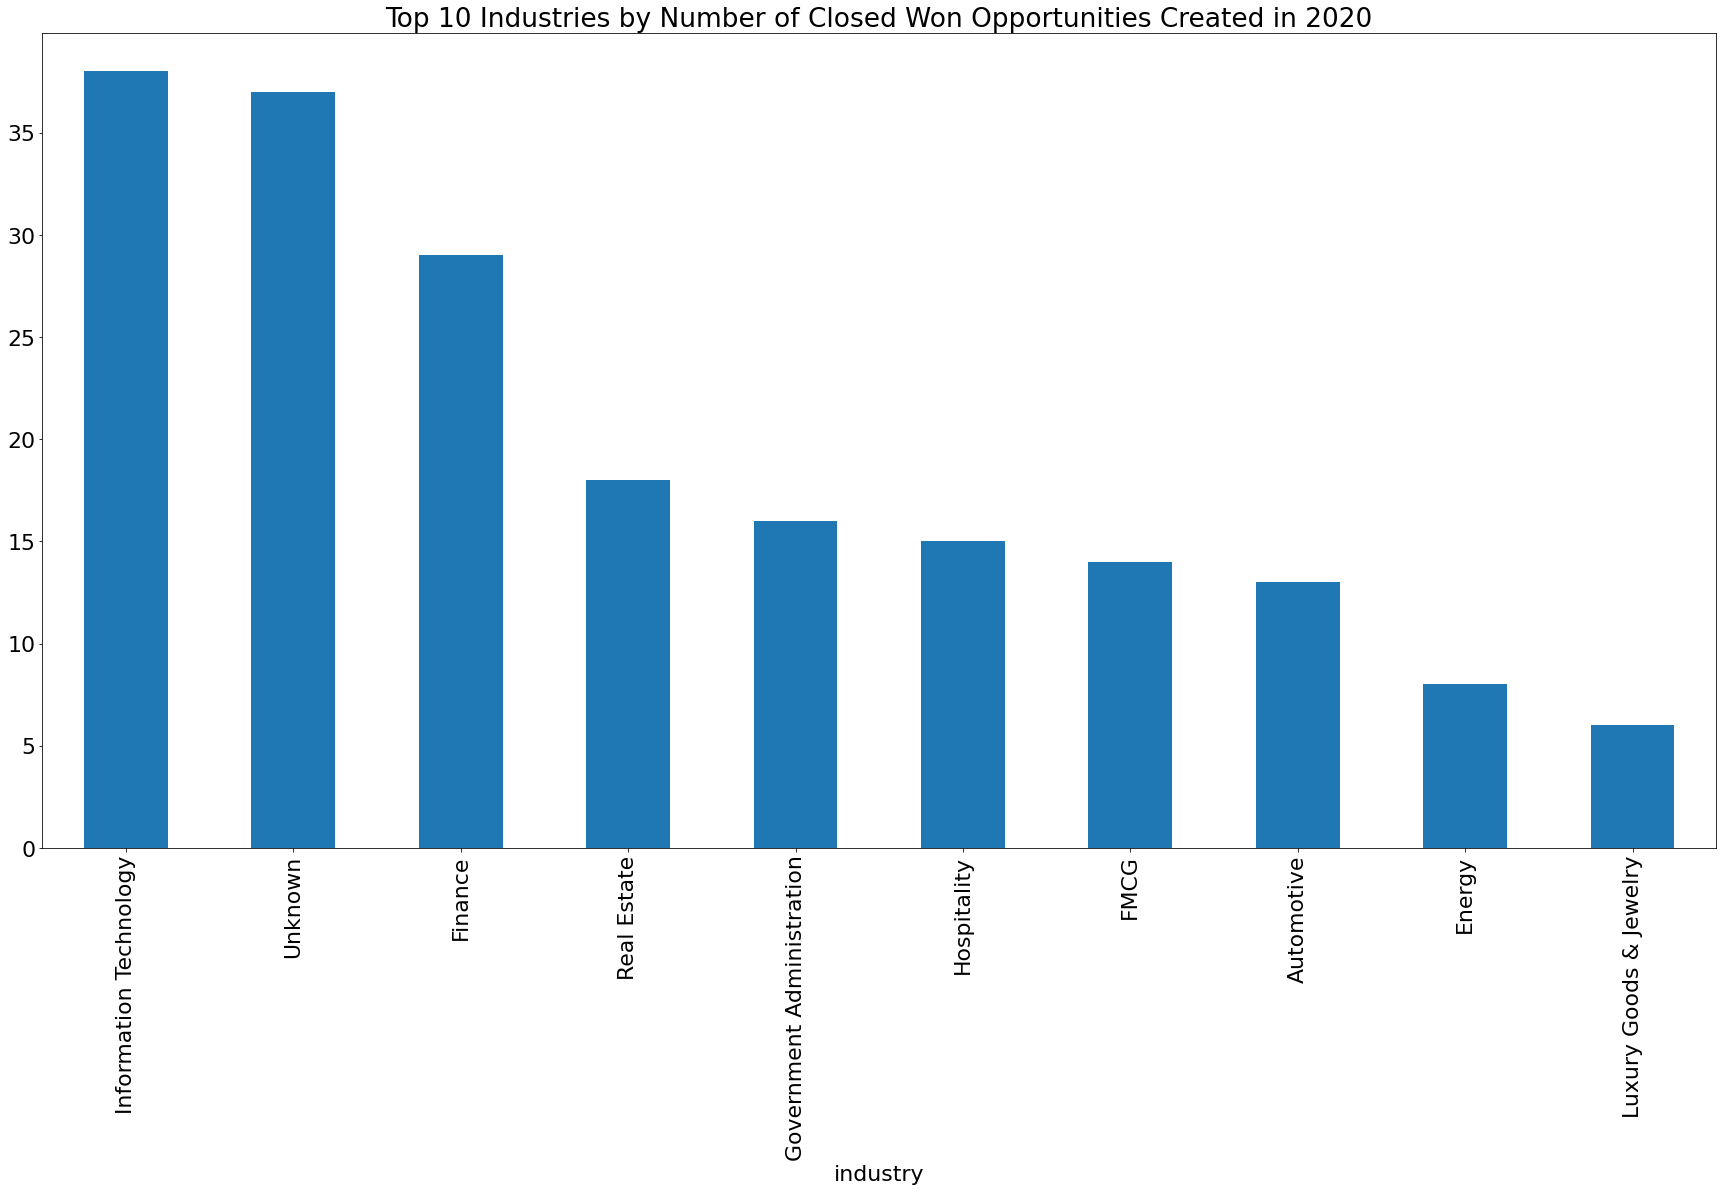

In [113]:
fig = plt.figure()


account_industries_by_close_opportunities_created_2020_data.head(10 ).plot(x = 'industry', y = 'closed_won_opportunities_created_in_2020', kind = 'bar', figsize = (30,15), legend=False)



plt.title('Top 10 Industries by Number of Closed Won Opportunities Created in 2020')



plt.show()

<Figure size 432x288 with 0 Axes>

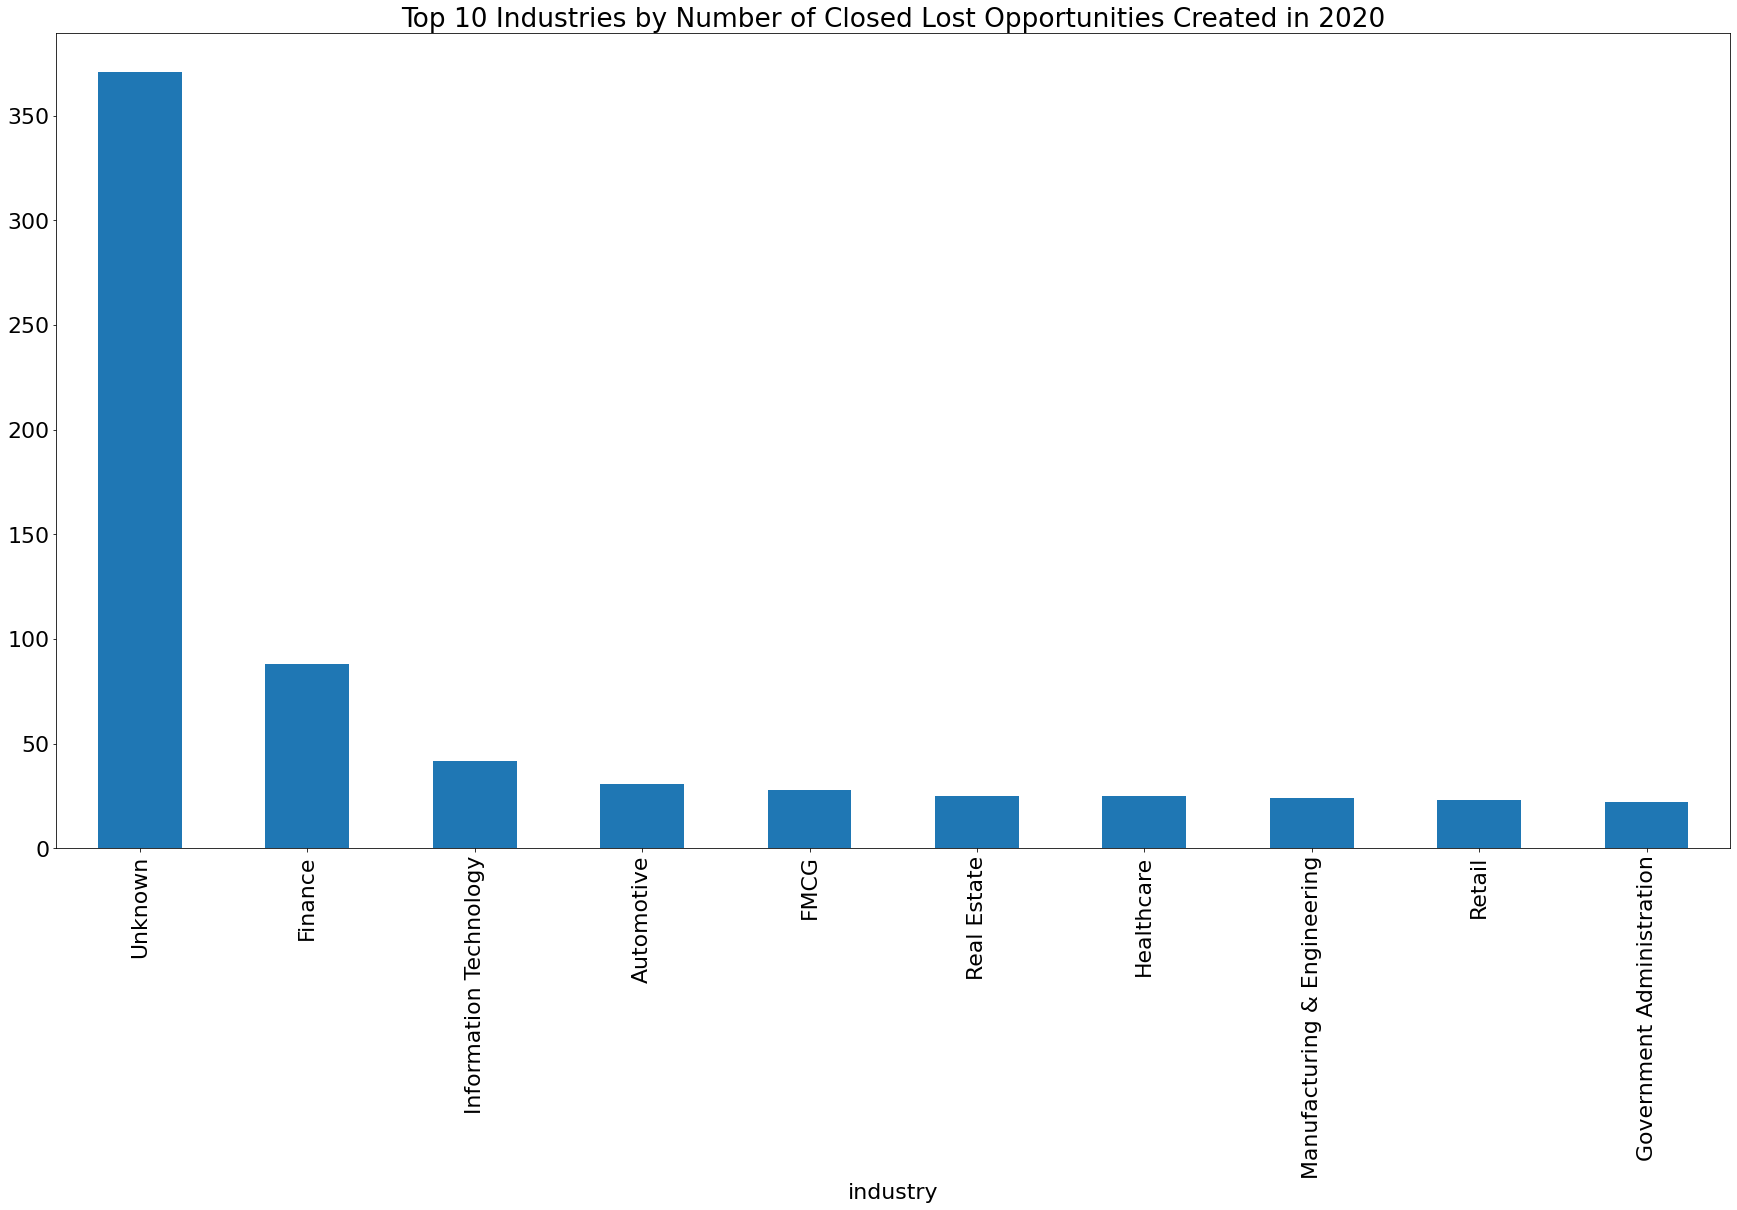

In [114]:
fig = plt.figure()

account_industries_by_close_opportunities_created_2020_data_lost = account_industries_by_close_opportunities_created_2020_data.sort_values('closed_lost_opportunities_created_in_2020', ascending=False)


account_industries_by_close_opportunities_created_2020_data_lost.head(10 ).plot(x = 'industry', y = 'closed_lost_opportunities_created_in_2020', kind = 'bar', figsize = (30,15), legend=False)


plt.title('Top 10 Industries by Number of Closed Lost Opportunities Created in 2020')



plt.show()

## We will not take into account clients for which we don't know the industry sector ('Unknown'). 

## - The Information Technology industry counted the most closed won opportunities created in 2020


## - The Finance industry counted the most closed lost opportunities created in 2020

# <a id='B) VP Sales'> B) VP Sales</a>

For open opportunities created since 2020:

1. How many upsell, cross-sell opportunities we expect to close in the 2nd quarter of 2021 (March 21 > June 21 ) ?





In [115]:
second_quarter_2021_opportunities_created_since_2020_query = '''

SELECT

    opportunity_type,
    

    
    COUNT(DISTINCT(id)) AS opportunities
    
FROM opportunities a


WHERE YEAR(created_date) >= 2020

-- we assume the data was extracted before July 2023

AND (close_date >= '2021-04-01' AND close_date < '2021-07-01')


GROUP BY 1

ORDER BY 2 DESC

'''

In [116]:
duckdb.sql(second_quarter_2021_opportunities_created_since_2020_query).df()

,opportunity_type,opportunities
0,new_business,164
1,cross-sell,30
2,renewal,9
3,upsell,6


## We assume the dataset is a snapshot as of June 2023 and therefore all opportunities that were expected to close in Q2 2021 are already closed. 

## We have a few opportunities with a close date taking place between January 2022 and May 2023 marked as 'Open'. We don't know whether these opportunities were won or lost. 

## We closed 6 upsell and 30 cross-sell opportunities in Q2 2021 (April 2021 - June 2021)

2. How many renewals we expect to close in the last quarter of 2021 (sep 21 > dec 21 ) ?


In [117]:
last_quarter_2021_opportunities_created_since_2020_query = '''

SELECT

    opportunity_type,
    

    
    COUNT(DISTINCT(id)) AS opportunities
    
FROM opportunities a


WHERE YEAR(created_date) >= 2020

-- we assume the data was extracted in June 2023

AND close_date >= '2021-10-01'

AND close_date < '2022-01-01'


GROUP BY 1

ORDER BY 2 DESC

'''

In [118]:
duckdb.sql(last_quarter_2021_opportunities_created_since_2020_query).df()

,opportunity_type,opportunities
0,new_business,188
1,cross-sell,30
2,renewal,18
3,upsell,9


## We closed 18 renewals in Q4 2021 (Oct 2021 - Dec 2021)

For close won opportunities in 2020:

3. Based on the Software revenue, who are the top 5 Sales of the year ? 

- we will use the current Euro - Dollar exchange rate of 0.93 Euros

### we will only consider here new business accounts

In [119]:
top_five_sales_year_2020_software_revenue_query = '''


SELECT

    CASE
    WHEN b.crm_user_id IS NULL THEN 'Unknown'
    ELSE b.full_name
    END AS sales_person,
    
    SUM(CASE WHEN currency_iso_code = 'USD' THEN deal_total_recurring_revenue * 0.93 ELSE deal_total_recurring_revenue END) AS total_software_revenue_new_business_euros
    
    
FROM opportunities a

LEFT JOIN crm_users b ON b.crm_user_id = a.owner_id

WHERE opportunity_stage_status = 'Won'

AND is_new_business = 'new_business'

AND YEAR(close_date) = 2020

GROUP BY 1

ORDER BY 2 DESC



'''

In [120]:
top_five_sales_year_2020_software_revenue_data = duckdb.sql(top_five_sales_year_2020_software_revenue_query).df()
top_five_sales_year_2020_software_revenue_data

,sales_person,total_software_revenue_new_business_euros
0,Anna Ayala,390540.1800
1,Jeffrey Page,300474.2600
2,Ryan Bird,280105.7088
3,David Meyer,251887.5900
4,Brittany Delgado,152137.4900
5,Ernest Morrison,125889.0900
6,Rebecca Baker,104430.0906
7,Christopher Garrett,77335.7500
8,Laura Harris,70464.5100
9,Lisa Mcdaniel,69466.6300


### The sales people's names might have been anonymized for privacy matters and may not be the actual names of the sales people at Toucan. The same logic could apply for account names.

### It would be highly beneficial to categorize the opportunities by country. In this CRM dataset, we only have the CRM users' regions

<Figure size 432x288 with 0 Axes>

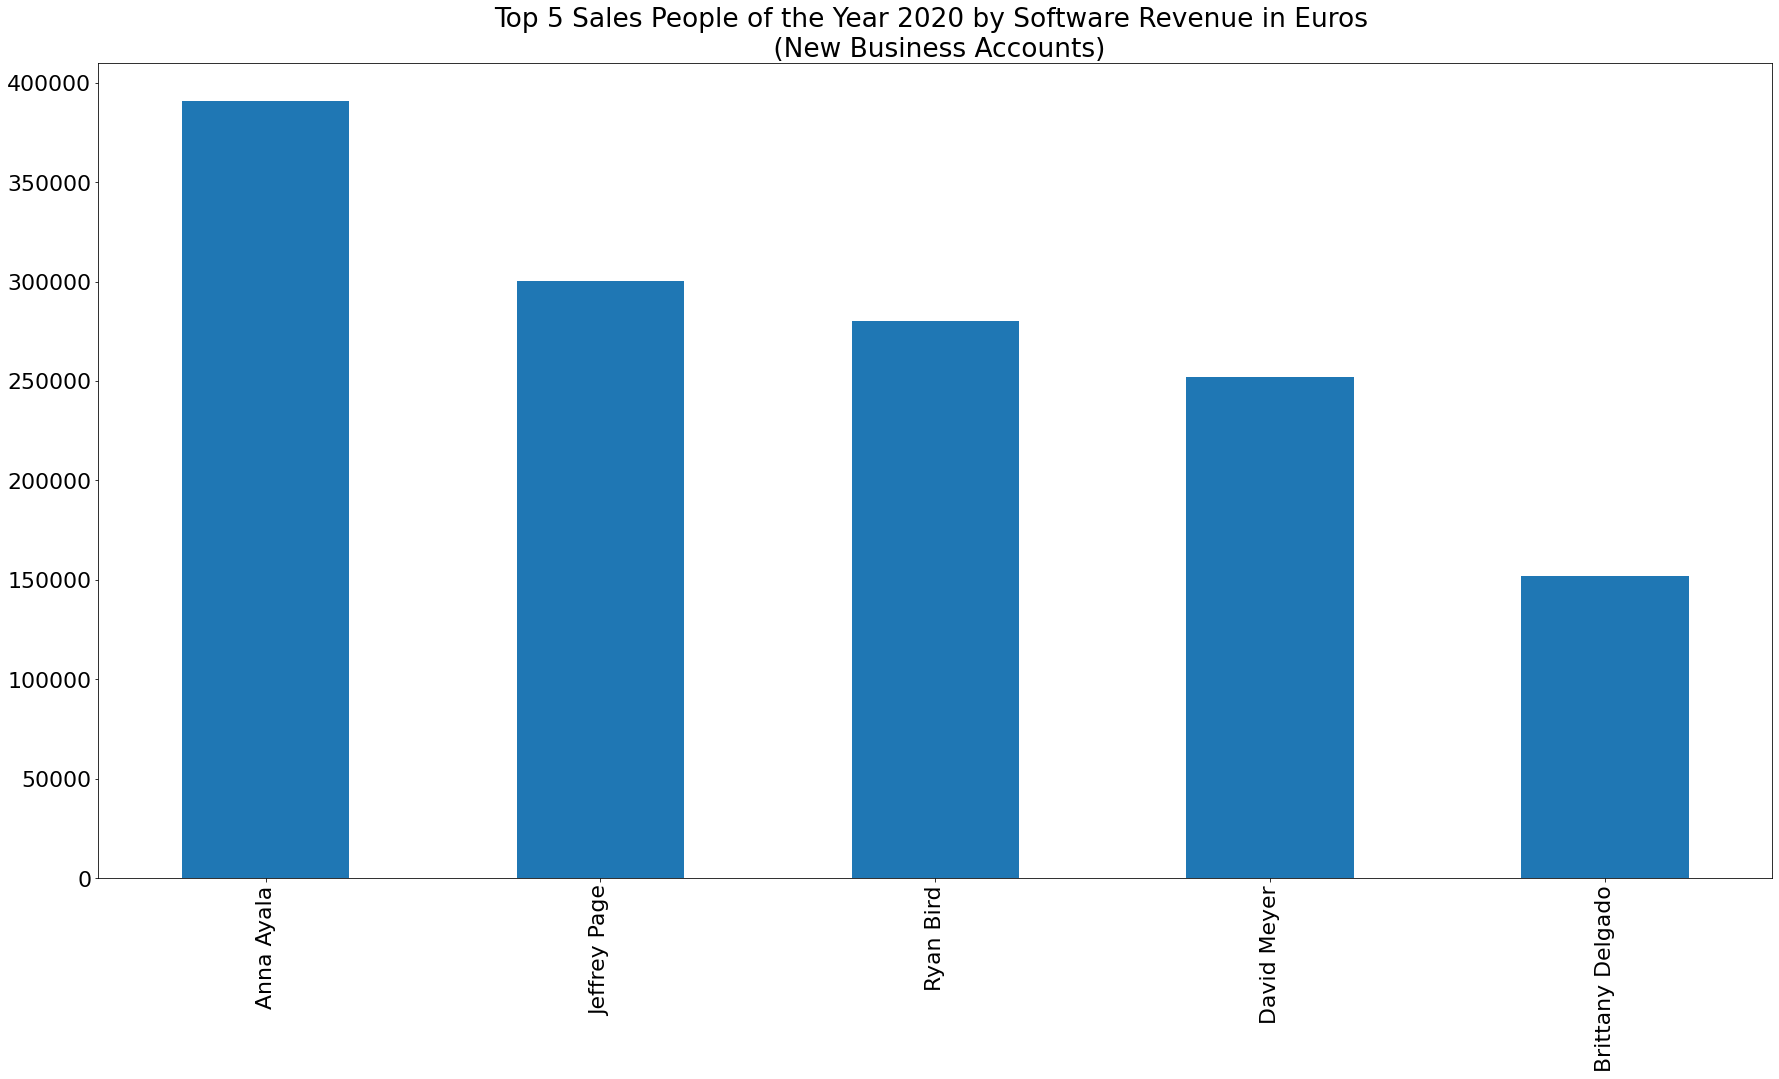

In [121]:
fig = plt.figure()


top_five_sales_year_2020_software_revenue_data.head(5).plot(x = 'sales_person', y = 'total_software_revenue_new_business_euros', kind = 'bar', figsize = (30,15), legend=False)


plt.title('Top 5 Sales People of the Year 2020 by Software Revenue in Euros \n (New Business Accounts)')

plt.xlabel('', fontsize=18)



plt.show()

## Anna Ayala, Jeffrey Page, Ryan Bird, David Meyer and Brittany Delgado are the top 5 sales people of the year for opportunities won in 2020 by software revenue when considering only opportunities from new business accounts.

# <a id='C) Head of Finance'> C) Head of Finance</a>

For opportunities created since 2018 :

1. Based on the Software Revenue, which is our top account customer ?


⚠️ All Software and Services revenue figures should be diplayed in Euros (1 EUR = 1,1 USD)



In [122]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### We only consider here won opportunities that were closed before July 2023, since the dataset seems to have been extracted as of June 2023

In [123]:
first_finance_query = '''


SELECT

    CASE
    WHEN b.account_id IS NULL THEN 'Unknown'
    ELSE b.name
    END AS account_name,
    
    CAST(SUM(CASE WHEN currency_iso_code = 'USD' THEN deal_total_recurring_revenue * 0.93 ELSE deal_total_recurring_revenue END) AS INTEGER) AS total_software_revenue_new_business_euros
    
    
FROM opportunities a

LEFT JOIN accounts b ON b.account_id = a.account_id

WHERE opportunity_stage_status = 'Won'


AND YEAR(created_date) >=  2018

AND close_date < '2023-07-01'

GROUP BY 1

ORDER BY 2 DESC

LIMIT 10

'''

In [124]:
first_finance_data = duckdb.sql(first_finance_query).df()
first_finance_data

,account_name,total_software_revenue_new_business_euros
0,Brown LLC,1993510
1,Fowler PLC,1648686
2,Ochoa PLC,1570264
3,Webb-Burgess,1209442
4,Edwards-Lane,1086689
5,"Francis, Wells and Gregory",1084504
6,"Hodges, Bowman and Hicks",1083326
7,Boyd-Mercado,877005
8,"Pierce, Estrada and Harrington",793581
9,Johnson LLC,758132


### The top account customer by software revenue for opportunities created since 2018 is Brown LLC

2. What is the Total ARR ?

For won opportunities with a subscription period running in 2020:

```

ARR = MRR * 12
MRR = RECURRING REVENUE / ENGAGEMENT PERIOD
ENGAGEMENT PERIOD (in months) = SOUSCRIPTION END DATE - SOUSCRIPTION START DATE

```

### We will only consider subscriptions from won opportunities for which we know the engagement period. We will not be able to include the recurring revenue from subscriptions for which we don't know the subscription period.

In [125]:
second_finance_query = '''

WITH mrr_table AS (

SELECT

    id,
    
    DATE_DIFF('MONTH', deal_licence_start_date, deal_licence_end_date) AS engagement_period_subscriptions,
    
    deal_licence_start_date,
    
    deal_licence_end_date,
    
    deal_total_recurring_revenue,
    
    CAST(deal_total_recurring_revenue AS DOUBLE) / CAST(DATE_DIFF('MONTH', deal_licence_start_date, deal_licence_end_date) AS DOUBLE) AS mrr,
    
    currency_iso_code


FROM opportunities a

LEFT JOIN accounts b ON b.account_id = a.account_id

WHERE opportunity_stage_status = 'Won'


AND YEAR(created_date) >=  2018



AND deal_total_recurring_revenue > 0

AND deal_licence_start_date IS NOT NULL 

AND  deal_licence_start_date IS NOT NULL






),

subscriptions_activity_table AS (


SELECT

    b.id,

    DATE_TRUNC('MONTH', CAST(a.ymd AS DATE)) AS ym,
    
    mrr,
    
    currency_iso_code
    

FROM date_dim a

INNER JOIN mrr_table b ON CAST(a.ymd AS DATE) >= CAST(b.deal_licence_start_date AS DATE) 

AND CAST(a.ymd AS DATE) <= CAST(b.deal_licence_end_date AS DATE)

WHERE CAST(a.ymd AS DATE) >= '2020-01-01'

AND CAST(a.ymd AS DATE) <= '2020-12-31'


GROUP BY 1,2,3,4

ORDER BY 1,2

)

SELECT

    CAST(SUM(CASE WHEN currency_iso_code = 'USD' THEN mrr * 0.93 ELSE mrr END) AS INTEGER) AS annual_recurring_revenue_euros_2020


FROM subscriptions_activity_table



'''

In [126]:
second_finance_data = duckdb.sql(second_finance_query).df()
second_finance_data 

,annual_recurring_revenue_euros_2020
0,7612271


## The annual recurring revenue in 2020 generated by opportunities created since 2018 amounts to 7,717,123 euros

# <a id='D) CEO'> D) CEO</a>

1. What is the average duration in month of our sales cycle in 2020 ?

Methodology:
    
- only consider opportunities for which the creation date is at least 30 days before the close date to remove outliers and inconsistent data

In [127]:
first_ceo_question_query = '''



SELECT

    CAST(SUM(DATEDIFF('MONTH', CAST(created_date AS DATE), CAST(close_date AS DATE))) AS DOUBLE) / CAST(COUNT(DISTINCT(id)) AS DOUBLE) AS avg_duration_months_sales_cycle_2020

FROM opportunities

WHERE created_date >= '2020-01-01' AND created_date <= '2020-12-31'


AND DATEDIFF('DAY', CAST(created_date AS DATE), CAST(close_date AS DATE)) > 30

AND opportunity_stage_status IN ('Lost', 'Won')

-- AND CAST(created_date AS DATE) < CAST(close_date AS DATE)


'''

In [128]:
first_ceo_question_data = duckdb.sql(first_ceo_question_query).df()
first_ceo_question_data

,avg_duration_months_sales_cycle_2020
0,4.374


## The average duration of the sales cycle in 2020 amounts to 4 months

2. What is the average duration in month of our optimized sales cycle in 2020 ?


```
Sales cycle duration = difference between created date and close date for opportunities which are closed lost and closed won

Sales cycle duration optimized = Sales cycle duration calculation but only for working days (days not included in weekends and public holidays)
```

In [129]:
second_ceo_question_query = '''

WITH first_table AS (


SELECT

    id,
    
    created_date,
    
    close_date
    

FROM opportunities

WHERE created_date >= '2020-01-01' AND created_date <= '2020-12-31'


AND DATEDIFF('DAY', CAST(created_date AS DATE), CAST(close_date AS DATE)) > 30

AND opportunity_stage_status IN ('Lost', 'Won')

-- AND CAST(created_date AS DATE) < CAST(close_date AS DATE)

),

activity_table AS (

SELECT

    CAST(a.ymd AS DATE) AS ymd,
    
    b.id,
    
    b.created_date,
    
    b.close_date
    
    
FROM date_dim a

INNER JOIN first_table b ON CAST(a.ymd AS DATE) >= CAST(b.created_date AS DATE) AND CAST(a.ymd AS DATE) <= CAST(b.close_date AS DATE)

WHERE is_weekend IS FALSE

AND is_public_holidays IS FALSE


)

SELECT

    CAST(COUNT(ymd) AS DOUBLE) / CAST(COUNT(DISTINCT(id)) * 30 AS DOUBLE) AS avg_duration_months_optimized_sales_cycle_2020


FROM activity_table

'''

In [130]:
second_ceo_question_data = duckdb.sql(second_ceo_question_query).df()
second_ceo_question_data

,avg_duration_months_optimized_sales_cycle_2020
0,3.083


## The average duration of the optimized sales cycle in 2020 amounts to 3 months